# Part I - Ford GoBike System Data Exploration
## by James Hansen

## Introduction

This jupyter notebook explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. These include both quantitative and qualitative features. 

### Contents:
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminary-Wrangling)
3. [Univariate Exploration](#univariate-exploration)
4. [Bivariate Exploration](#bivariate-exploration)
5. [Multivariate Exploration](#multivariate-exploration)
6. [Conclusions](#conclusions)

## Preliminary Wrangling

In this section, I will understand the data types and structure before cleaning the data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

# disable warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


# Helpful variables
base_color = sb.color_palette()[0]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordgobike.csv")

# Make 'clean' copy of the dataframe
df_clean = df.copy(deep=True)

In [3]:
# Using .info()
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Display first 10 rows
print("Shape:", df.shape)
df.head(10)

Shape: (183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


Notes:
- Null values
    1. start_station_id, start_station_name
    2. end_station_id, end_station_name
    3. member_birth_year
    4. member_gender
- Dtypes:
    1. start_time, end_time > dateTime
    2. start_station_id, end_station_id > int
    3. member_birth_year > int
    4. member_gender, user_type, bike_share_for_all_trip > nominal catergorical

In [5]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Most of these features are numeric but aren't useful values for descriptive statistics as they lack a meaningful numerical interpretation or order (nominal data). Only 'duration_sec', 'member_birth_year' are useful since they hold ordinal values for statistics.

In [6]:
# descriptive statistics for numeric variables
# Choose only 'duration_sec', 'member_birth_year' since they hold logical values for statistics
df[["duration_sec", "member_birth_year"]].describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


Notes:
 - member_birth_year 
    1. minimum birth year = 1878 ?
- duration_sec
    1. max 85444 - does this make sense? need minutes or hours conversation

#### Duplicates

In [7]:
# Check for duplicates
print("Number of duplicated rows:", df.duplicated().sum())

Number of duplicated rows: 0


#### Investigate Null Values

In [8]:
# Investigate null values in data set

# Looks like if start_station_id is NaN, then start_station_name, end_station_id and end_station_name are also NaN.
df[["start_station_id", "start_station_name", "end_station_id", "end_station_name"]][
    df.start_station_id.isnull()
]

,start_station_id,start_station_name,end_station_id,end_station_name
475,NaN,NaN,NaN,NaN
1733,NaN,NaN,NaN,NaN
3625,NaN,NaN,NaN,NaN
4070,NaN,NaN,NaN,NaN
5654,NaN,NaN,NaN,NaN
...,...,...,...,...
176154,NaN,NaN,NaN,NaN
179730,NaN,NaN,NaN,NaN
179970,NaN,NaN,NaN,NaN
180106,NaN,NaN,NaN,NaN


197 rows contain NaN values for start_station_id, start_station_name, end_station_id and end_station_name. They all also happen to be paired together. 

This would have minimal effect considering the total dataset contains 183,412 observations. This is about 0.1% of the set. It would be easiest to drop these rows since there is no way of filling the data right now.

In [9]:
# Similarly for member_birth_year, member_gender - they are paired in their NaN values
df[["member_birth_year", "member_gender"]][df.member_birth_year.isnull()]

,member_birth_year,member_gender
1,NaN,NaN
13,NaN,NaN
28,NaN,NaN
53,NaN,NaN
65,NaN,NaN
...,...,...
183354,NaN,NaN
183356,NaN,NaN
183363,NaN,NaN
183371,NaN,NaN


Both member_birth_year, member_gender has significantly more missing values, about 4.5% of the dataset or 8265 rows. We can choose to fill the missing member birth years with either the mean or median value or drop the values. Some caution should be used as it should not affect the overall distribution. 

In the case of member gender, this could possibly be filled with 'Other' since we can't assume gender or recover the information quickly. If we chose to fill it with 'Other', this could affect the distribution. I think the best option would be to drop the rows in this case.

#### Handle null values 

We will drop the null rows for start_station_id, start_station_name, end_station_id and end_station_name as well as member_gender and member_birth_year.

In [10]:
df_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
# Drop null rows for station features
df_clean.dropna(
    subset=[
        "start_station_id",
        "start_station_name",
        "end_station_id",
        "end_station_name",
        "member_birth_year",
        "member_gender",
    ],
    inplace=True,
)

In [12]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Investigate descriptive statistics anomalies

A possibly useful column for analysis for would be the age of our customers. Since we know this data is from 2019, we can subtract this from the birth year to create an age column.

In [13]:
# Create age column and cast to int type
df_clean["member_age"] = (2019 - df_clean.member_birth_year).astype(int)

In [14]:
# Get value counts for member birth year and sort by year
member_birth_year_counts = df_clean.member_birth_year.value_counts().sort_index()
member_birth_year_counts

member_birth_year
1878.0       1
1900.0      53
1901.0       6
1902.0      11
1910.0       1
          ... 
1997.0    3476
1998.0    3208
1999.0    2504
2000.0    1675
2001.0      34
Name: count, Length: 75, dtype: int64

In [15]:
print("start_time.min", df_clean.start_time.min())
print("start_time.max", df_clean.start_time.max())
print("end_time.min", df_clean.end_time.min())
print("end_time.max", df_clean.end_time.max())

start_time.min 2019-02-01 00:00:20.6360
start_time.max 2019-02-28 23:59:18.5480
end_time.min 2019-02-01 00:04:52.0580
end_time.max 2019-03-01 08:01:55.9750


The dataset contains bike trip information for the month of February 2019 with the last entry on March 1st 2019. The earliest birth year given is 1878. It is unlikely that someone born in 1878 would be cycling as they would be 141 years old. There actually quite a few early 1900's birth years.

Using the data from San Francisco Health Improvement Partnership (found [here](https://sfhip.org/chna/community-health-data/mortality/)), we can see the life expectancy was 83 years old in 2017. 

This is good enough for purpose of this report. I'll replace all rows with member ages greater than 83 to the median as to not distort the distribution (the distribution is right-skewed seen in univariate section) and to show how to perform this. (Note, I could also drop these rows which would be better.)

In [16]:
# Original
df_clean.member_age.value_counts().sort_index(ascending=False)

member_age
141       1
119      53
118       6
117      11
109       1
       ... 
22     3476
21     3208
20     2504
19     1675
18       34
Name: count, Length: 75, dtype: int64

In [17]:
median_member_birth_year = df_clean.member_birth_year.median()
print("median of birth year:", median_member_birth_year)

median of birth year: 1987.0


In [18]:
median_member_age = int(df_clean.member_age.median())
print("median of age:", median_member_age)

median of age: 32


In [19]:
print(
    "# of members over 83 years old:",
    df_clean.member_age[df_clean.member_age > 83].count(),
)

# of members over 83 years old: 189


In [20]:
# Replace rows with ages greater than 83
df_clean.loc[df_clean.member_age > 83, "member_birth_year"] = (
    2019 - median_member_age
)  # birth_year
df_clean.loc[df_clean.member_age > 83, "member_age"] = median_member_age  # age

In [21]:
# Check
df_clean.member_age.value_counts().sort_index(ascending=False)

member_age
81       3
80      11
78       9
77      21
76      30
      ... 
22    3476
21    3208
20    2504
19    1675
18      34
Name: count, Length: 63, dtype: int64

### Handle data types

Convert user_type, member_gender and bike_share_for_all_trip to un-ordered categorical data types.

Convert start_time / end_time to dateTime objects.

Convert member_birth_year to int

In [22]:
print("Dtypes:")
print(df_clean.dtypes)

Dtypes:
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
member_age                   int64
dtype: object


In [23]:
# get value names for non-numeric categories
print("user_type", df_clean.user_type.unique(), "\n")
print("member_gender", df_clean.member_gender.unique(), "\n")
print("bike_share_for_all_trip", df_clean.bike_share_for_all_trip.unique(), "\n")

user_type ['Customer' 'Subscriber'] 

member_gender ['Male' 'Other' 'Female'] 

bike_share_for_all_trip ['No' 'Yes'] 



In [24]:
# convert nominal features into un-ordered categorical types
nominal_var_dict = {
    "user_type": df_clean.user_type.unique().tolist(),
    "member_gender": df_clean.member_gender.unique().tolist(),
    "bike_share_for_all_trip": df_clean.bike_share_for_all_trip.unique().tolist(),
}

for var in nominal_var_dict:
    unordered_var = pd.api.types.CategoricalDtype(
        ordered=False, categories=nominal_var_dict[var]
    )
    df_clean[var] = df_clean[var].astype(unordered_var)


# Convert start_time and end_timeto dateTime objects
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)


# CONVERT member_birth_year to int
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

In [25]:
print("Dtypes:")
print(df_clean.dtypes)

Dtypes:
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
member_age                          int64
dtype: object


In [26]:
df_clean["duration_min"] = (df_clean.duration_sec / 60).astype(int)
df_clean.duration_min

0          869
2         1030
3          608
4           26
5           29
          ... 
183407       8
183408       5
183409       2
183410       2
183411       4
Name: duration_min, Length: 174952, dtype: int64

In [27]:
df_clean["duration_hr"] = (df_clean.duration_sec / 360).astype(int)
df_clean.duration_hr

0         144
2         171
3         101
4           4
5           4
         ... 
183407      1
183408      0
183409      0
183410      0
183411      0
Name: duration_hr, Length: 174952, dtype: int64

In [28]:
# reorder columns
df_clean = df_clean[
    [
        "start_time",
        "end_time",
        "start_station_id",
        "start_station_name",
        "start_station_latitude",
        "start_station_longitude",
        "end_station_id",
        "end_station_name",
        "end_station_latitude",
        "end_station_longitude",
        "bike_id",
        "user_type",
        "member_birth_year",
        "member_gender",
        "bike_share_for_all_trip",
        "member_age",
        "duration_sec",
        "duration_min",
        "duration_hr",
    ]
]

# Reset index
df_clean = df_clean.reset_index(drop=True)

Final cleaned dataset

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  float64       
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  category      
 12  member_birth_yea

In [30]:
df_clean[
    ["member_birth_year", "member_age", "duration_sec", "duration_min", "duration_hr"]
].describe()

,member_birth_year,member_age,duration_sec,duration_min,duration_hr
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,1984.876269,34.123731,704.002744,11.241461,1.444139
std,9.874473,9.874473,1642.204905,27.371269,4.572887
min,1938.000000,18.000000,61.000000,1.000000,0.000000
25%,1980.000000,27.000000,323.000000,5.000000,0.000000
50%,1987.000000,32.000000,510.000000,8.000000,1.000000
75%,1992.000000,39.000000,789.000000,13.000000,2.000000
max,2001.000000,81.000000,84548.000000,1409.000000,234.000000


In [31]:
df_clean[
    ["member_birth_year", "member_age", "duration_sec", "duration_min", "duration_hr"]
].describe()

,member_birth_year,member_age,duration_sec,duration_min,duration_hr
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,1984.876269,34.123731,704.002744,11.241461,1.444139
std,9.874473,9.874473,1642.204905,27.371269,4.572887
min,1938.000000,18.000000,61.000000,1.000000,0.000000
25%,1980.000000,27.000000,323.000000,5.000000,0.000000
50%,1987.000000,32.000000,510.000000,8.000000,1.000000
75%,1992.000000,39.000000,789.000000,13.000000,2.000000
max,2001.000000,81.000000,84548.000000,1409.000000,234.000000


In [32]:
df_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_sec,duration_min,duration_hr
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,52185,869,144
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,61854,1030,171
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,36490,608,101
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,1585,26,4
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,1793,29,4


Save to file

In [33]:
df_clean.to_csv("fordgobike_clean.csv", index=False)

### What is the structure of your dataset?

There are 183,412 bike trips (rows) in the dataset with 16 features (columns). This was reduced to 174,952 observations after null values or outliers were filled or dropped. There are numeric variables as well as dateTime, and nominal categorical variables. I also created a new 17th feature called member_age derived from member_birth_year as well as two other features that were created by converting duration_sec to minutes and hours, resulting in 19 columns total.


The nominal categorical variables are: 


- member_gender: Customer, Subscriber <br>
- bike_share_for_all_trip: Male, Other, Female  <br>
- user_type: No, Yes

The numeric variables are:
- duration_sec
- duration_min
- duration_hr
- member_birth_year
- member_age
- latitudes / longitudes

The time-series variables are:
- start_time
- end_time


### What is/are the main feature(s) of interest in your dataset?

I'm interested in exploring the variables and observing their interactions. In particular, I'll like to understand bike usage patterns and different customer demographics and how bike usage patterns vary per hour, day and week in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The categorical features will be most useful to understand customer demographics, whilst the features (duration_sec/_min/_hr) would inform on bike usage. All these features could affect the trends in time. I expect that start_time and end_time will be most useful to understand the temporal aspect of the data. The station latitude and longitude will offer spatial information.

## Univariate Exploration

I'll start off by looking at the various features individually and then together. I'll also explore the various time distributions and usage patterns throughout.

In [34]:
numeric_vars = [
    "duration_sec",
    "duration_min",
    "duration_hr",
    "member_birth_year",
    "member_age",
]
categoric_vars = ["user_type", "member_gender", "bike_share_for_all_trip"]

##### Question

What do the frequency plots of the categorical features tell us?

##### Visualization

<Axes: xlabel='user_type', ylabel='count'>

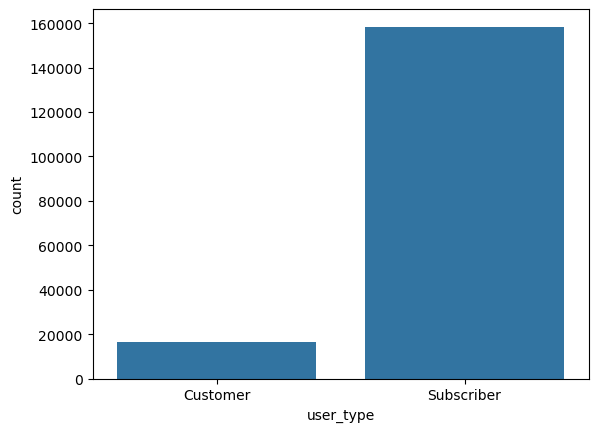

In [35]:
# Using seaborn's countplot() function to visualize the distribution of user_type
sb.countplot(data=df_clean, x="user_type", color="tab:blue")

<Axes: xlabel='member_gender', ylabel='count'>

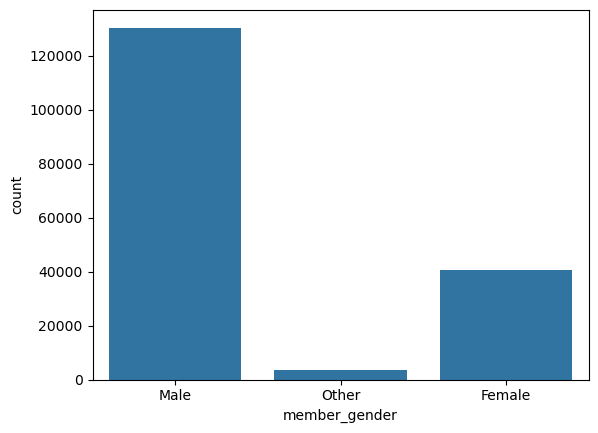

In [36]:
# Using seaborn's countplot() function to visualize the menber_gender distribution
sb.countplot(data=df_clean, x="member_gender", color="tab:blue")

Text(0, 0.5, 'count')

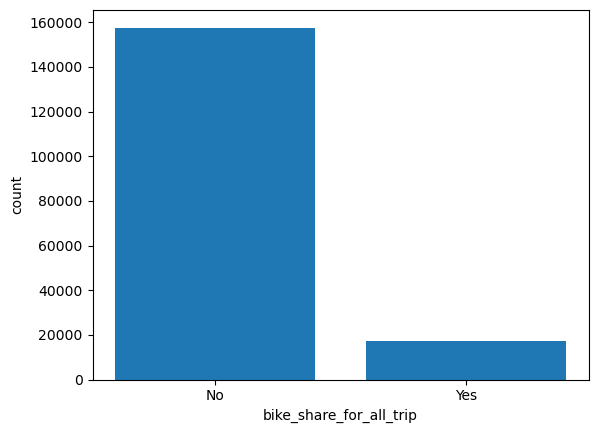

In [37]:
# Use matplotlib's bar function to visualize the bike_share_for_all_trip distribution
plt.bar(
    x=df_clean.bike_share_for_all_trip.value_counts().index,
    height=df_clean.bike_share_for_all_trip.value_counts(),
)
plt.xlabel("bike_share_for_all_trip")
plt.ylabel("count")

##### Observations

The frequency plots above indicate that most bike trips are done by subscribers rather than one-off customers - this could be due to the purpose of the bike, perhaps users use it for the same purpose everyday (eg. to/from work or school). Males also use the ford bike system about 3 times as much as females and finally than most bike trips aren't a share for all trip.

##### Question

What do the distributions of the numeric features tell us?

##### Visualization

<Axes: xlabel='member_birth_year', ylabel='count'>

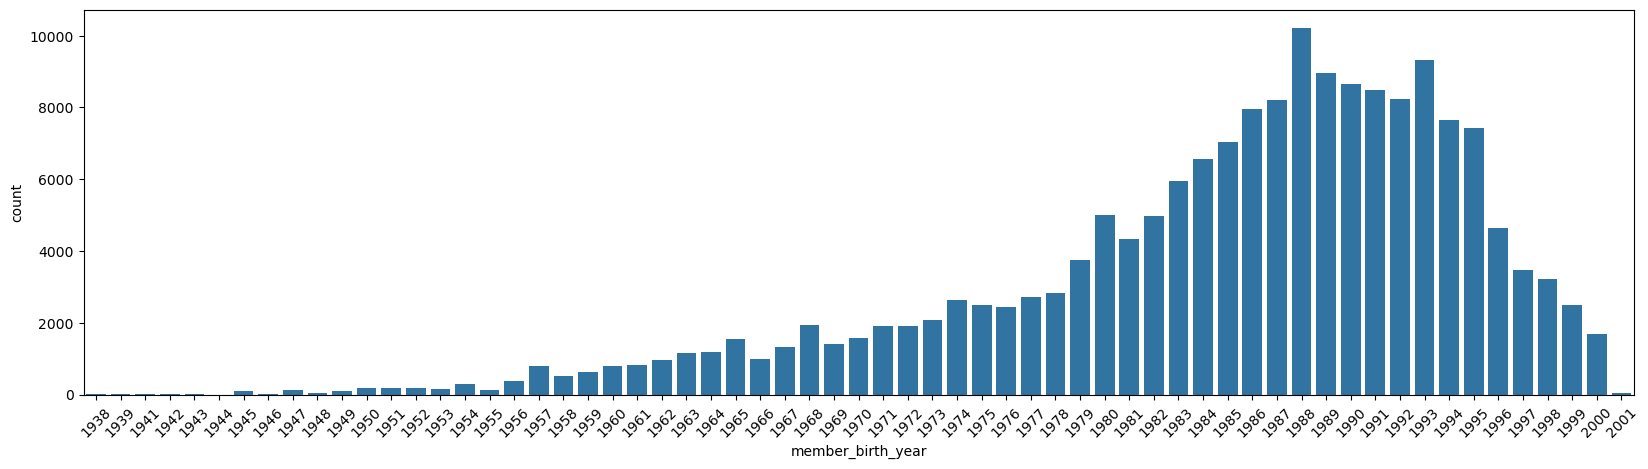

In [38]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
sb.countplot(data=df_clean, x="member_birth_year", color="tab:blue")

<Axes: xlabel='member_age', ylabel='count'>

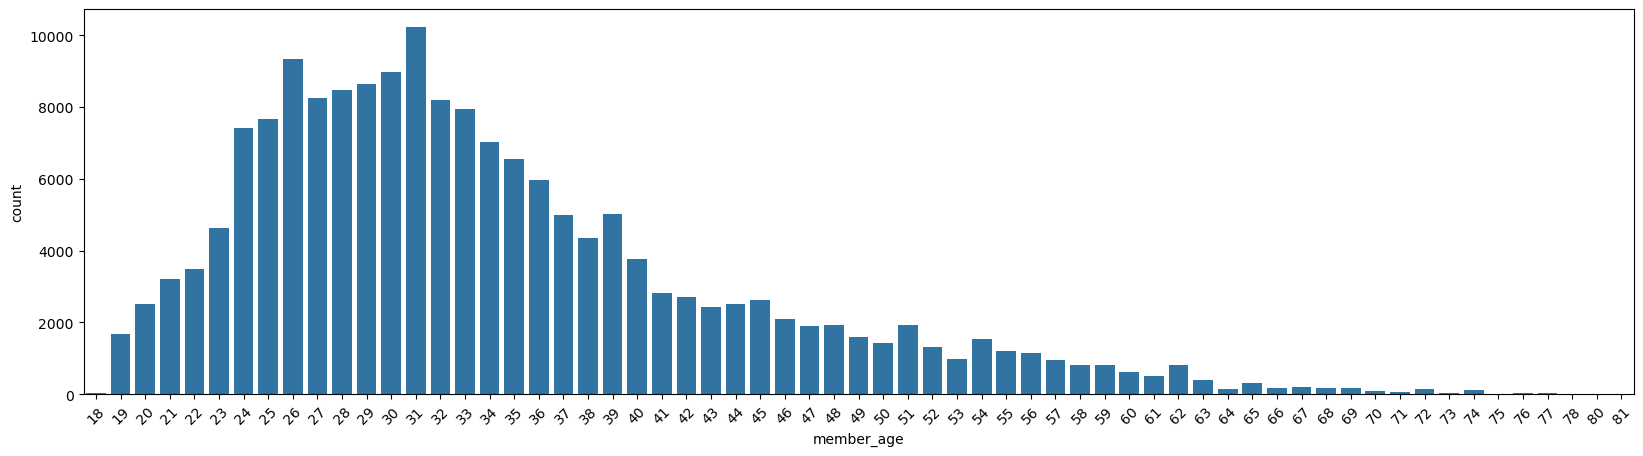

In [39]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
sb.countplot(data=df_clean, x="member_age", color="tab:blue")

##### Observation

The member birth year and age are reciprocals of each other - this is expected due to how the member age was derived from the data. The bike usage peaks between the ages of 25 - 32. The most common user age is 31 years (which is the median) with 26 being the next highest.

##### Visualization

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (seconds)')

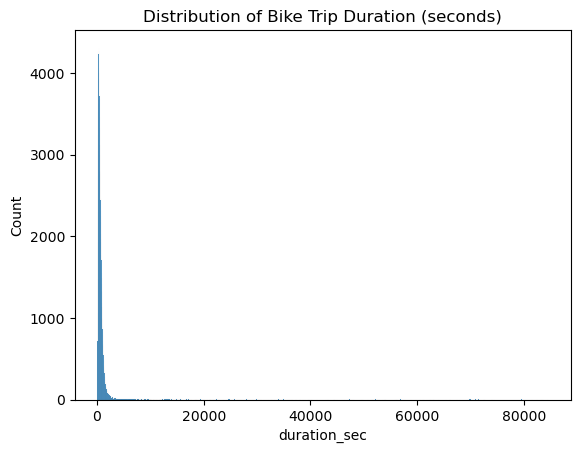

In [40]:
# Using seaborn's histplot() function to visualize the distribution of duration_sec
sb.histplot(data=df_clean, x="duration_sec")
plt.title("Distribution of Bike Trip Duration (seconds)")

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (minutes)')

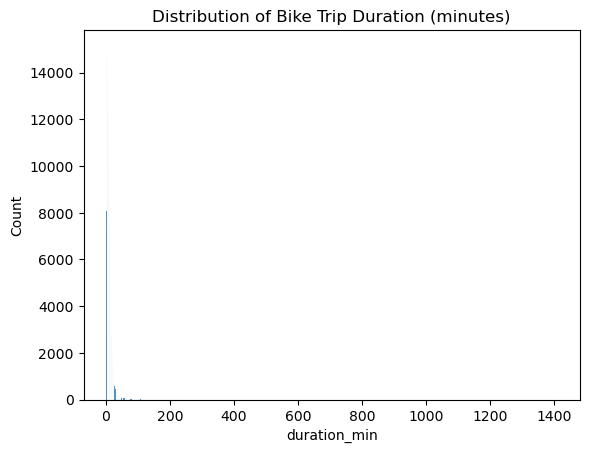

In [41]:
sb.histplot(data=df_clean, x="duration_min")
plt.title("Distribution of Bike Trip Duration (minutes)")

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (hours)')

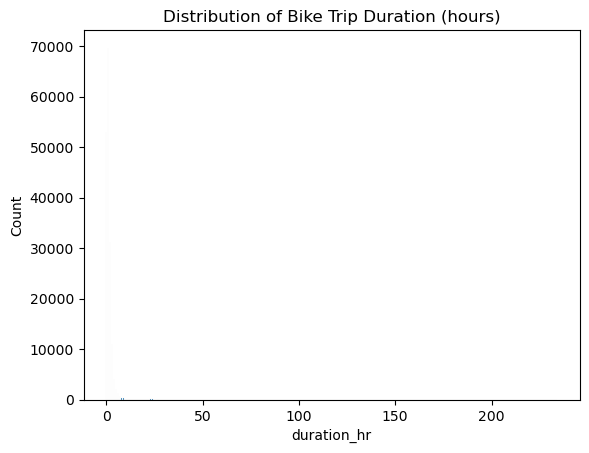

In [42]:
sb.histplot(data=df_clean, x="duration_hr")
plt.title("Distribution of Bike Trip Duration (hours)")

##### Observation

The above plots are right-skewed. There looks to be a pattern in the minutes distribution as well. It is difficult to see the distributions however, I'll reduce the axis limits to zoom in closer on the left-hand side of the plot. 

##### Visualization

([<matplotlib.axis.XTick at 0x134e60ad0>,
 [Text(0, 0, '0'),
  Text(300, 0, '5'),
  Text(600, 0, '10'),
  Text(900, 0, '15'),
  Text(1200, 0, '20'),
  Text(1500, 0, '25'),
  Text(1800, 0, '30'),
  Text(2100, 0, '35'),
  Text(2400, 0, '40'),
  Text(2700, 0, '45'),
  Text(3000, 0, '50'),
  Text(3300, 0, '55'),
  Text(3600, 0, '60')])

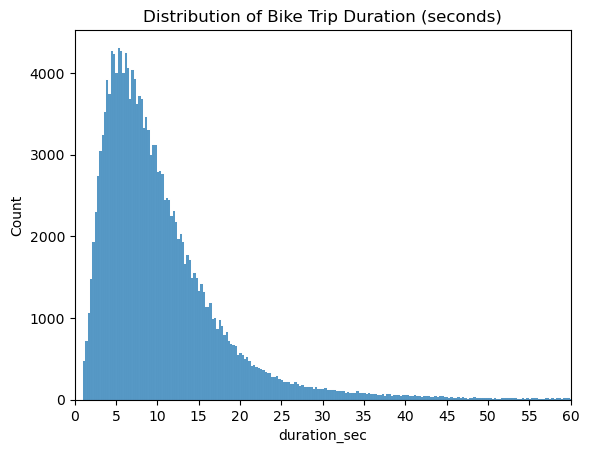

In [43]:
sb.histplot(data=df_clean, x="duration_sec")
plt.title("Distribution of Bike Trip Duration (seconds)")
plt.xlim((0, 3600))  # 60 minutes / 1 hour
plt.xticks(np.arange(0, 3600 + 300, 300), np.arange(0, 65, 5))

(0.0, 60.0)

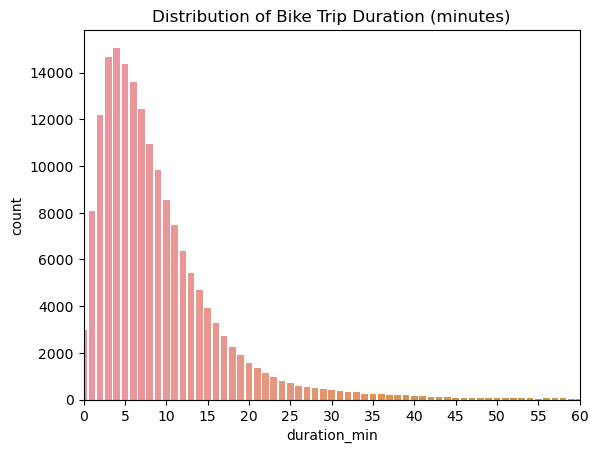

In [44]:
sb.countplot(data=df_clean, x="duration_min")
plt.title("Distribution of Bike Trip Duration (minutes)")
plt.xticks(np.arange(0, 65, 5), np.arange(0, 65, 5))
plt.xlim((0, 60))  # 60 minutes

([<matplotlib.axis.XTick at 0x13d918950>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

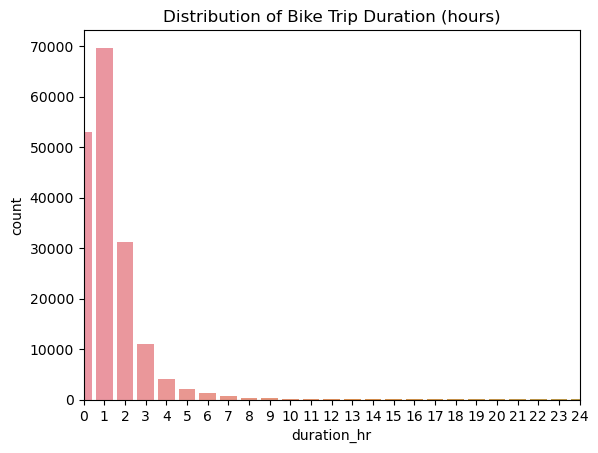

In [45]:
sb.countplot(data=df_clean, x="duration_hr")
plt.title("Distribution of Bike Trip Duration (hours)")
plt.xlim((0, 24))  # 24 hours
plt.xticks(np.arange(0, 25, 1), np.arange(0, 25, 1))

##### Observations

The above plots confirm the shape of the distribution - right-skewed. The duration_minutes might indicate the most common trip is 5 minutes however the finer-grain set of duration seconds informs us the most common trip is actuall 6-8 minutes. The duration in hours indicates that most bike trips are an hour or less in general.

##### Visualizations

Decided to use matplotlib's hist function to confirm results and explore minutes distribution.

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (x-limit = 60 minutes)')

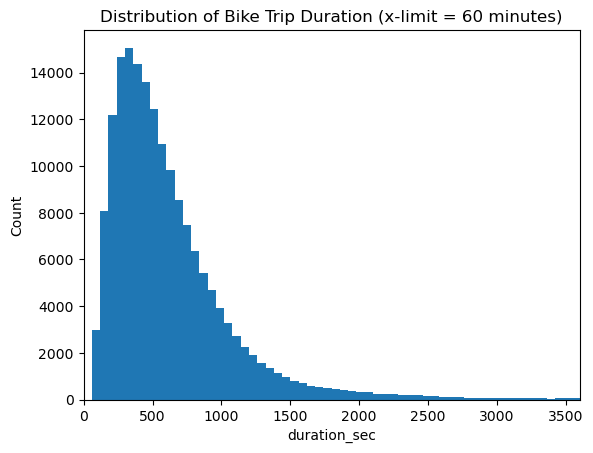

In [46]:
# using plt.hist() for fun

bins = np.arange(
    0, df_clean.duration_sec.max() + 60, 60
)  # bins = 1 minute or 60 seconds

plt.figure()
plt.hist(data=df_clean, x="duration_sec", bins=bins)
plt.xlim((0, 3600))
plt.xlabel("duration_sec")
plt.ylabel("Count")
plt.title("Distribution of Bike Trip Duration (x-limit = 60 minutes)")

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (x-limit = 60 minutes)')

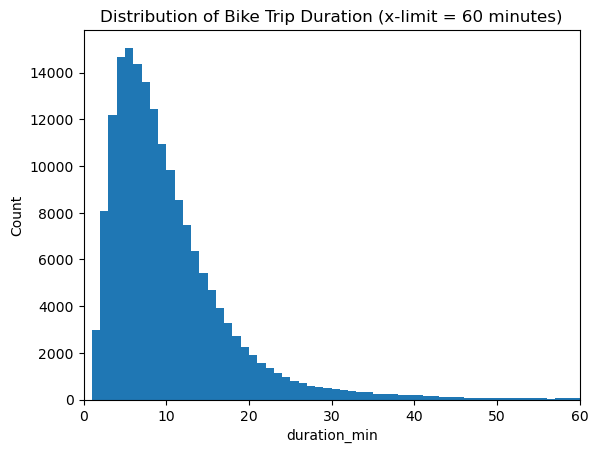

In [47]:
# using plt.hist() for fun

bins = np.arange(
    df_clean.duration_min.min(), df_clean.duration_min.max() + 1, 1
)  # bins = 1 minute

plt.figure()
plt.hist(data=df_clean, x="duration_min", bins=bins)
plt.xlim((0, 60))
plt.xlabel("duration_min")
plt.ylabel("Count")
plt.title("Distribution of Bike Trip Duration (x-limit = 60 minutes)")

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (x-limit = 24 hours)')

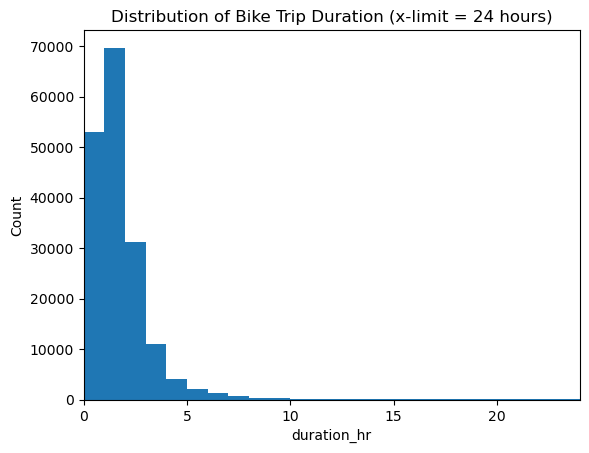

In [48]:
# using plt.hist() for fun

bins = np.arange(
    df_clean.duration_hr.min(), df_clean.duration_hr.max() + 1, 1
)  # bins = 1 hour

plt.figure()
plt.hist(data=df_clean, x="duration_hr", bins=bins)
plt.xlim((0, 24))
plt.xlabel("duration_hr")
plt.ylabel("Count")
plt.title("Distribution of Bike Trip Duration (x-limit = 24 hours)")

##### Observations

Zooming in and altering the bin sizes reveals the possible odd pattern before was due to the bin range. The most common duration appears to be about 5 minutes with a decline afterwards. Most rides are below an hour with a steep drop off after this point.

It looks like the data might follow a log-normal distribution. Let's apply the log transformation and replot.

##### Visualization

Apply log transform

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (log)')

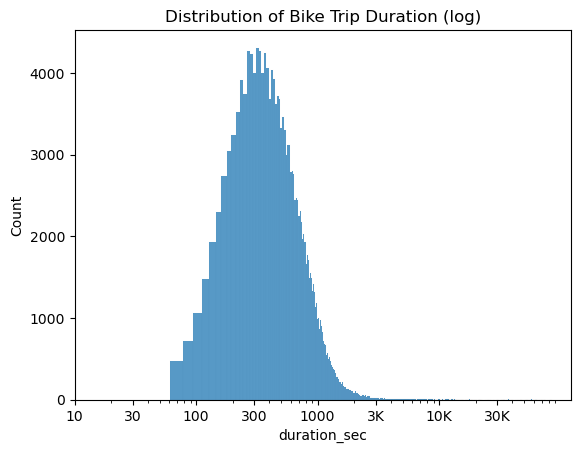

In [49]:
# Axis transformation

ax = sb.histplot(data=df_clean, x="duration_sec", bins="auto")

ax.set_xscale("log")

# Generate the x-ticks
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = [10, 30, 100, 300, 1000, "3K", "10K", "30K"]

plt.xticks(ticks, labels)
plt.title("Distribution of Bike Trip Duration (log)")

Alter bin widths to log scale

In [50]:
# get column stats
df_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [51]:
# convert to log base 10
np.log10(df_clean.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (log)')

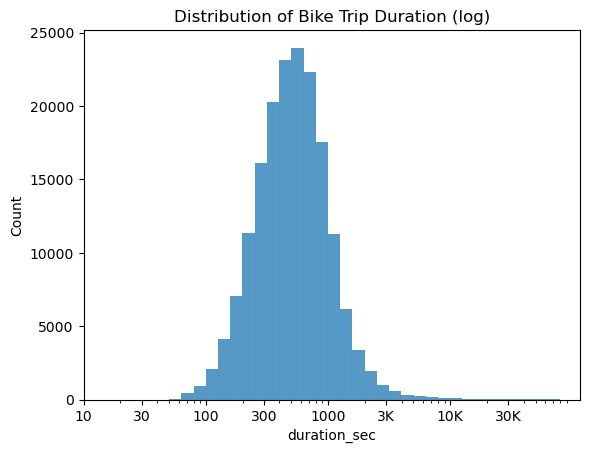

In [52]:
# Axis transformation
# Bin size
bins_log = 10 ** np.arange(1.7, 5, 0.1)

ax = sb.histplot(data=df_clean, x="duration_sec", bins=bins_log)
ax.set_xscale("log")

# Generate the x-ticks
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = [10, 30, 100, 300, 1000, "3K", "10K", "30K"]

plt.xticks(ticks, labels)
plt.title("Distribution of Bike Trip Duration (log)")

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (log)')

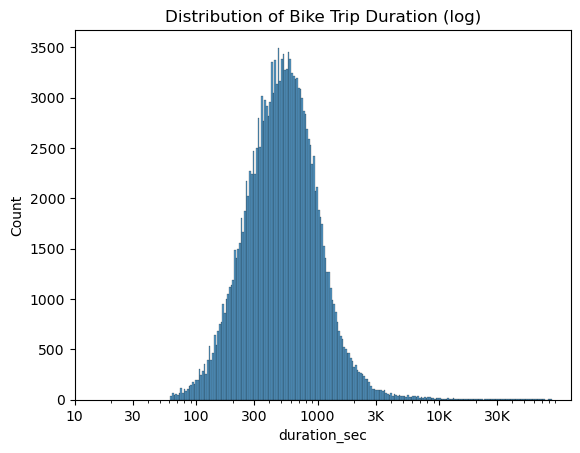

In [53]:
# Confirm with seaborn's histplot
ax = sb.histplot(data=df_clean, x="duration_sec", bins="auto", log_scale=True)

# Generate the x-ticks
ticks = [10, 30, 100, 300, 1000, 3000, 10000, 30000]
labels = [10, 30, 100, 300, 1000, "3K", "10K", "30K"]

plt.xticks(ticks, labels)
plt.title("Distribution of Bike Trip Duration (log)")

It is difficult to intepret seconds in this scale so I'll use minutes for the x-axis instead. Note, I don't use duration_min data but the duration_sec column and simply use the appropiate tick marks on the axis.

Text(0.5, 0, 'duration_sec (in minutes)')

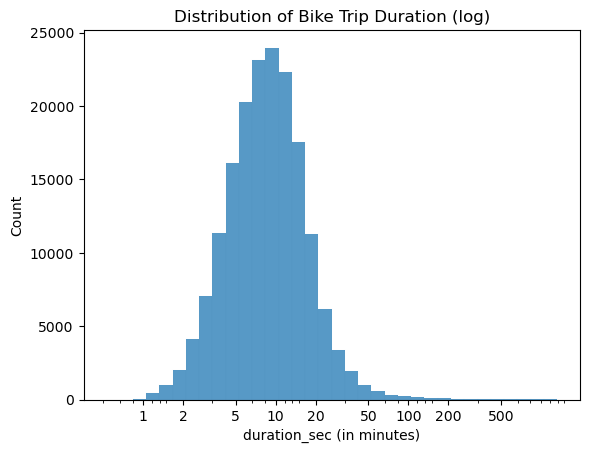

In [54]:
# Axis transformation
# Bin size
bins_log = 10 ** np.arange(1.5, 5, 0.1)

ax = sb.histplot(data=df_clean, x="duration_sec", bins=bins_log)
ax.set_xscale("log")

# Generate the x-ticks
ticks = np.array([60, 120, 300, 600, 1200, 3000, 6000, 12000, 30000])

# Convert ticks into string values, to be displaye along the x-axis
labels = [f"{round(v/60)}" for v in ticks]

plt.xticks(ticks, labels)
plt.title("Distribution of Bike Trip Duration (log)")
plt.xlabel("duration_sec (in minutes)")

##### Observation


When plotted to the log axis the data is approximately Gaussian looking. The data is centered around 6-8 minutes.

The distribution of bike trip durations was extremely right-skewed. After taking the log transformation, an clear unimodel distribition formed that was approximately gaussian shaped. Although it was different between the duration_sec and duration minutes columns as a result of the rounding loss. It is  clear though that most bike trips were between 5 - 20 minutes, with the most trips being under 10 minutes and the majority under an hour..

#### Time-Series Features

##### Question

What are average number of trips from Monday to Sunday in February 2019?

##### Visualization

In [55]:
# Get number of Mondays, Tuesdays, Wednesdays, etc., in February 2019

# Generate a date range for February 2019
date_range = pd.date_range(start="2019-02-01", end="2019-02-28", freq="D")

# Create a DataFrame with the date range
df_feb_2019 = pd.DataFrame({"date": date_range})

# Extract the day of the week and count occurrences
day_counts = df_feb_2019["date"].dt.day_name().value_counts()

# Display the result
print(day_counts)

date
Friday       4
Saturday     4
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: count, dtype: int64


Text(0, 0.5, 'Count')

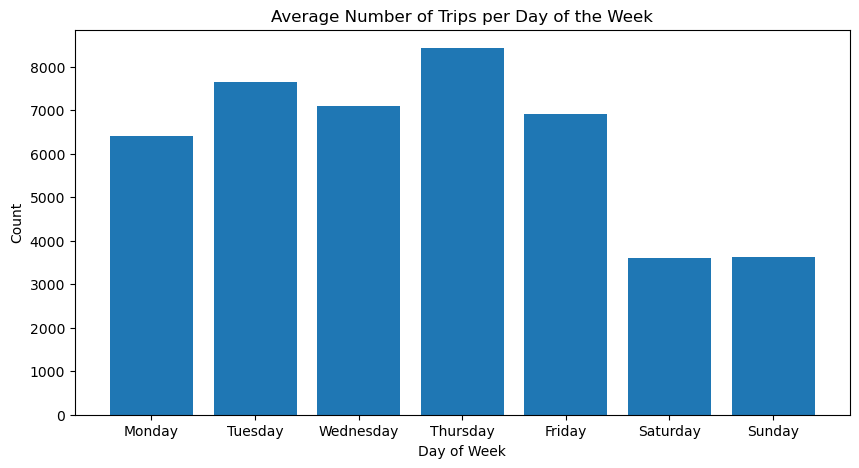

In [56]:
day_name_counts = df_clean.start_time.dt.day_name().value_counts()

# Sort the index by day of the week
day_name_counts = day_name_counts.reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

day_name_average_count = day_name_counts / 4
plt.figure(figsize=(10, 5))
plt.bar(
    x=day_name_average_count.index,
    height=day_name_average_count.values.tolist(),
    color=base_color,
)
plt.title("Average Number of Trips per Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Count")

##### Observation

The plot above indicates a drop off in bike rentals during the weekends. This could be due to a work day week where bikes are rented for work transportation from Monday to Friday, then aren't they needed for the same uses on the weekend - maybe only recreation.

##### Question

How does the total number of bike trips change over the course of the month?

##### Visualization

Text(0.5, 1.0, 'Total Number of Bike Trips per Day (during Feb 2019)')

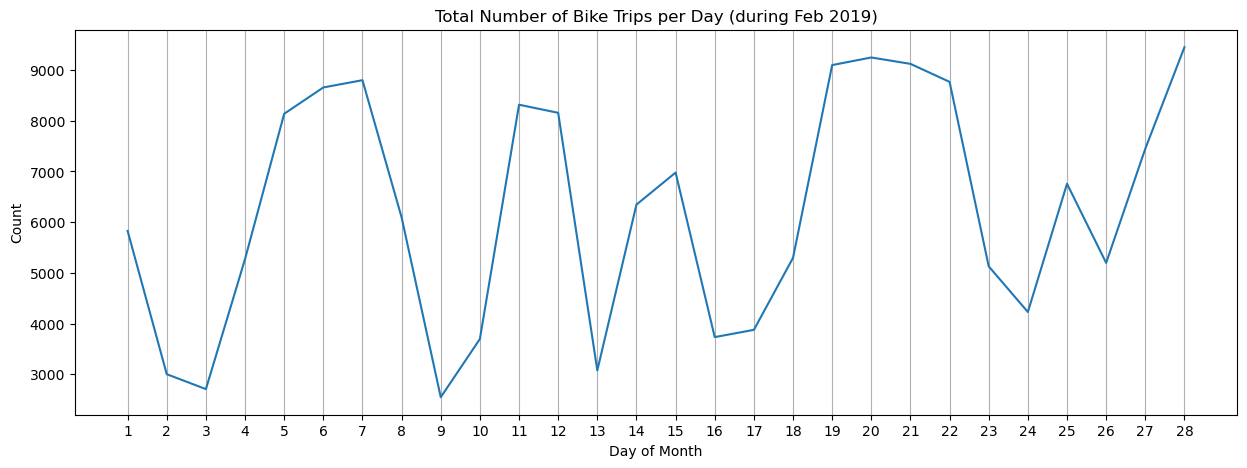

In [57]:
day_counts = df_clean.start_time.dt.day.value_counts().sort_index()
plt.figure(figsize=(15, 5))
plt.plot(day_counts.index, day_counts.values.tolist())

# Generate the x-ticks
ticks = range(1, 29, 1)

# Convert ticks into string values, to be displaye along the x-axis
labels = [f"{v}" for v in ticks]

plt.xticks(ticks, labels)
plt.grid(axis="x")
plt.ylabel("Count")
plt.xlabel("Day of Month")
plt.title("Total Number of Bike Trips per Day (during Feb 2019)")

##### Observation

Looking at the total number of bikes trips per day over the course of the month, a pattern emerges - a peak over 3-4 days followed by a trough over 1-2 days. This mimics the week day cycle and confirms the above hypothesis that bike trips drop over the weekend.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Both member_age and duration_sec (bike trip duration) were right-skewed unimodal distributions. The duration in seconds in particular took on a large range of values so I performed a log transformation. Under the transformation, the data looked unimodel, with one peak between 6 - 8 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

An interesting pattern that emerged was the bike usages during the work week versus the weekday. In general, bike usage increased as the month draw to a close with the highest usage the last work week before the end of the month.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

##### Question

What are the correlations between the numeric variables?

##### Visualization

Text(0.5, 1.0, 'Correlation Heatmap between Numeric Variables')

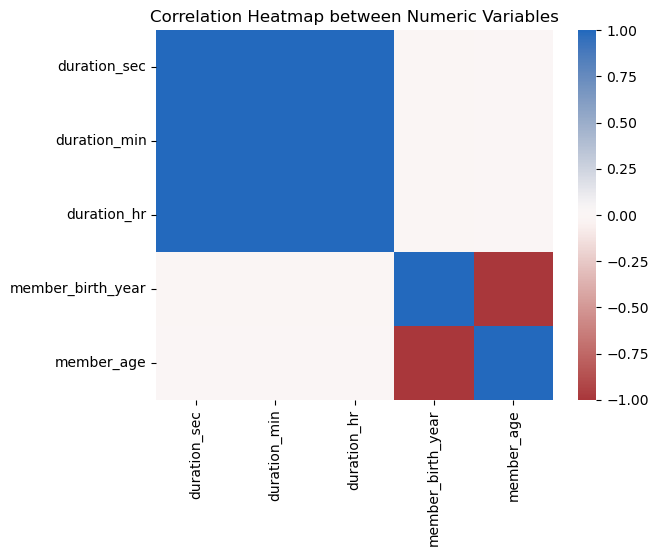

In [58]:
# correlation plot between variables
plt.figure()
sb.heatmap(df_clean[numeric_vars].corr(), cmap="vlag_r", center=0)
plt.title("Correlation Heatmap between Numeric Variables")

df_clean.shape= (174952, 19)
df_clean_samp.shape= (500, 19)


Text(0.5, 1, 'Plot Matrix of  Numeric Variables')

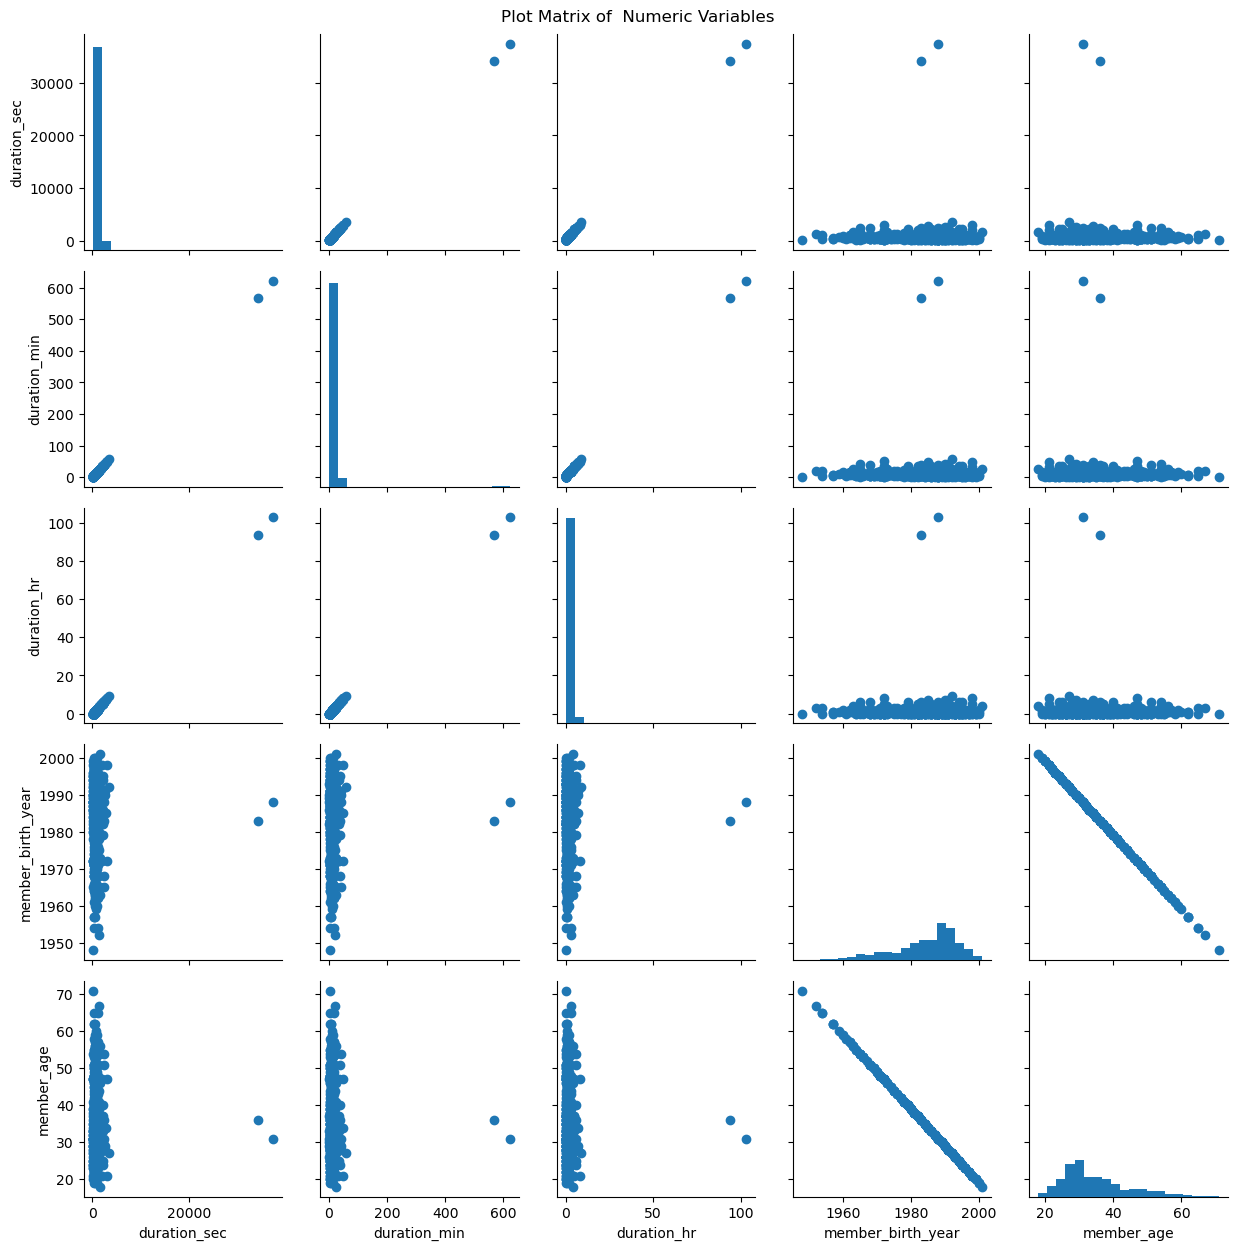

In [59]:
# plot matrix: sample 500 bike trips so that plots are clearer and they render faster
print("df_clean.shape=", df_clean.shape)
df_clean_samp = df_clean.sample(n=500, replace=False)
print("df_clean_samp.shape=", df_clean_samp.shape)


g = sb.PairGrid(data=df_clean_samp, vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
g.fig.suptitle("Plot Matrix of  Numeric Variables", y=1)

##### Observation

The heatmap and plot matrix of the correlations doesn't provide any extra details. 

It was expected that member birth year and age with be perfectly negatively correlated since age was derived from birth year. Similarly for duration in minutes and hours. would be strongly positively correlated with duration seconds due to the way it was derived.

The other correlations are simply uninformative.

##### Question

What does the bike locations tell us?

##### Visualization

Location (Spatial) Data

Text(0.06, 0.5, 'Latitude')

<Figure size 640x480 with 0 Axes>

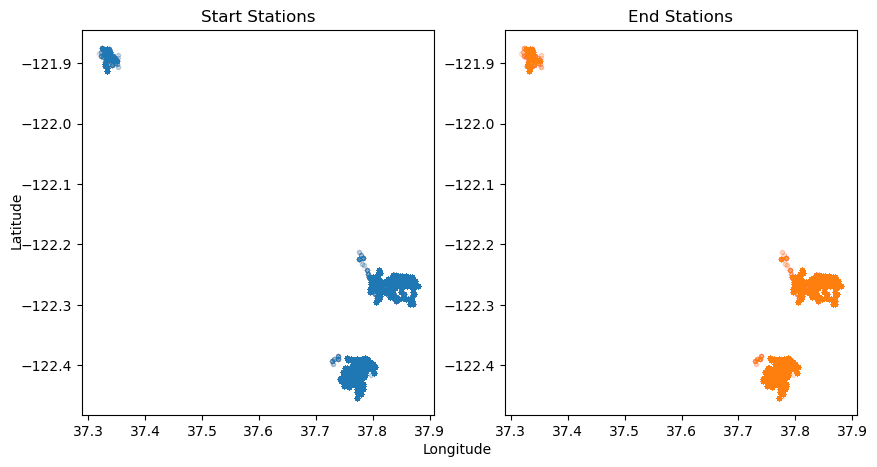

In [60]:
plt.figure()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

ax0.scatter(
    x="start_station_latitude",
    y="start_station_longitude",
    data=df_clean,
    alpha=0.01,
    marker=".",
    c="tab:blue",
)

ax1.scatter(
    x="end_station_latitude",
    y="end_station_longitude",
    data=df_clean,
    alpha=0.01,
    marker=".",
    c="tab:orange",
)

ax0.set_title("Start Stations")
ax1.set_title("End Stations")

# Set common labels
fig.text(0.5, 0.04, "Longitude", ha="center", va="center")
fig.text(0.06, 0.5, "Latitude", ha="center", va="center", rotation="vertical")

##### Observation

The noteworthy insight from these plots is that the station locations are clumped into three groups. Start and end destinations are similarly grouped.

##### Question

What are the relationships between the categorical and numeric variables?

<Figure size 1000x1500 with 0 Axes>

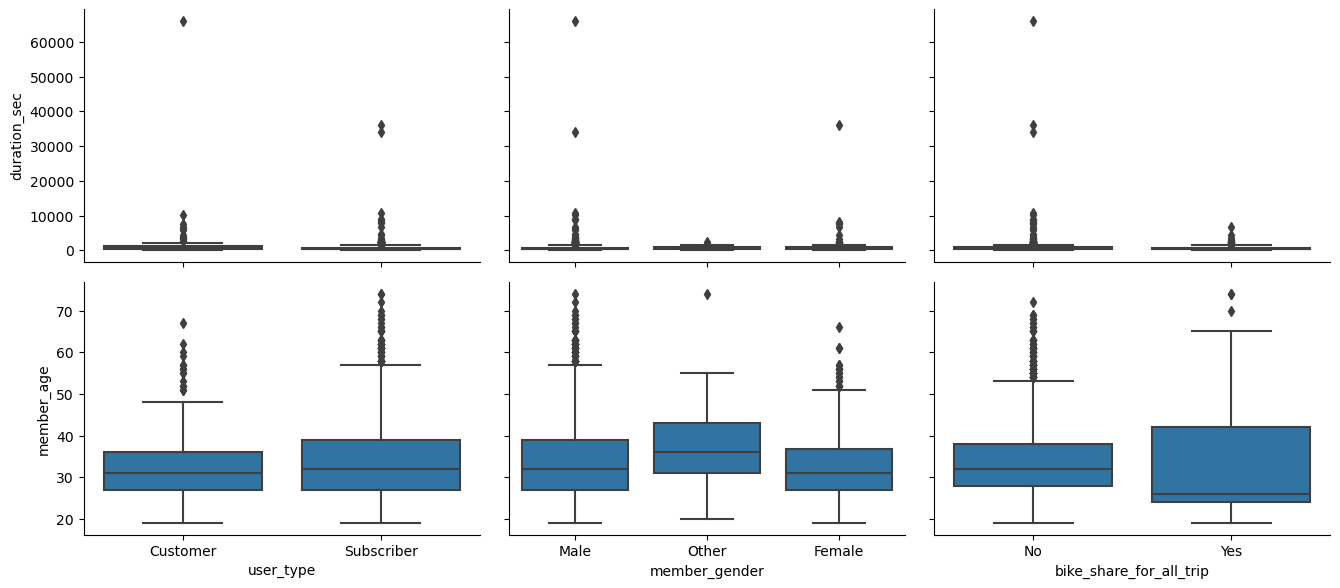

In [61]:
# plot matrix of numeric features against categorical features.

# plot matrix: sample 10K bike trips so that plots render faster
df_clean_samp = df_clean.sample(n=2000, replace=False)


def boxgrid(x, y, **kwargs):
    """Quick hack for creating box plots with seaborn's PairGrid."""
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)


plt.figure(figsize=(10, 15))
g = sb.PairGrid(
    data=df_clean_samp,
    y_vars=["duration_sec", "member_age"],
    x_vars=categoric_vars,
    height=3,
    aspect=1.5,
)
g.map(boxgrid)
plt.show()

<Figure size 1000x1000 with 0 Axes>

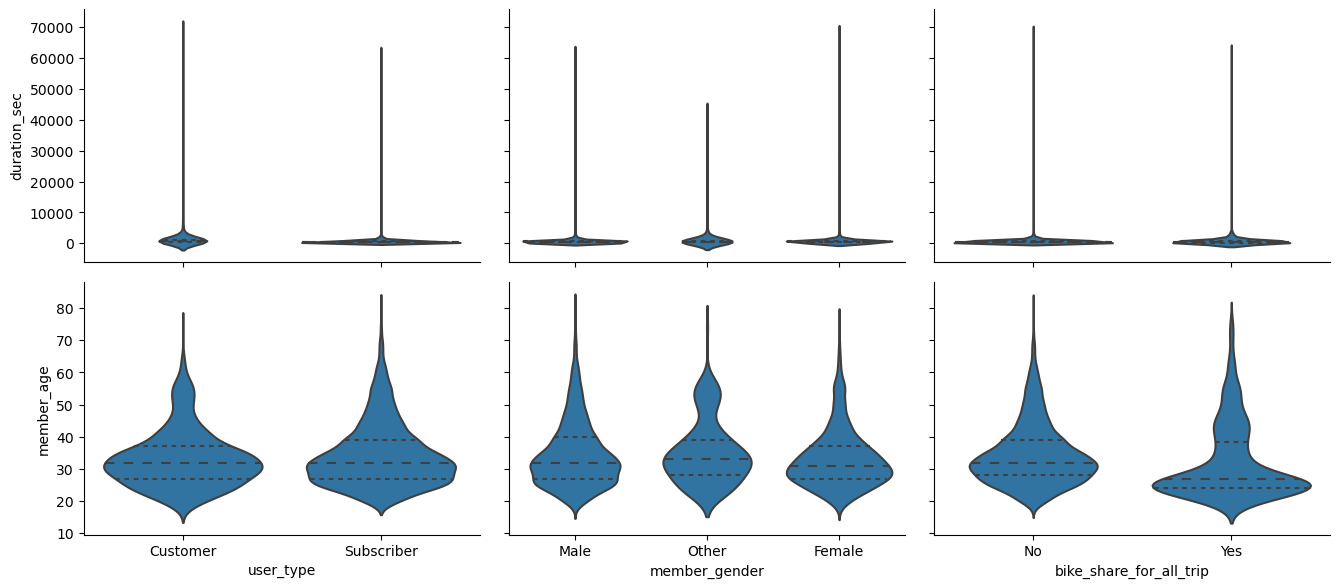

In [62]:
# plot matrix of numeric features against categorical features.

# plot matrix: sample 10K bike trips so that plots render faster
df_clean_samp = df_clean.sample(n=10000, replace=False)


def violingrid(x, y, **kwargs):
    """Quick hack for creating violin plots with seaborn's PairGrid."""
    default_color = sb.color_palette()[0]
    sb.violinplot(x=x, y=y, color=default_color, inner="quartile")


plt.figure(figsize=(10, 10))
g = sb.PairGrid(
    data=df_clean_samp,
    y_vars=["duration_sec", "member_age"],
    x_vars=categoric_vars,
    height=3,
    aspect=1.5,
)
g.map(violingrid)
plt.show()

##### Observation

The box plots indicate that about 50% of the data comes from users who are younger than about 35 years old. Secondly, that almost 100% of trips are less than 2500 seconds or 41 minutes regardless of categorical differences, trips longer than this are outliers. The violin plots highlight the skewness of the data towards younger ages in particular.

##### Question

What are the relationships between the three categorical features?

##### Visualization

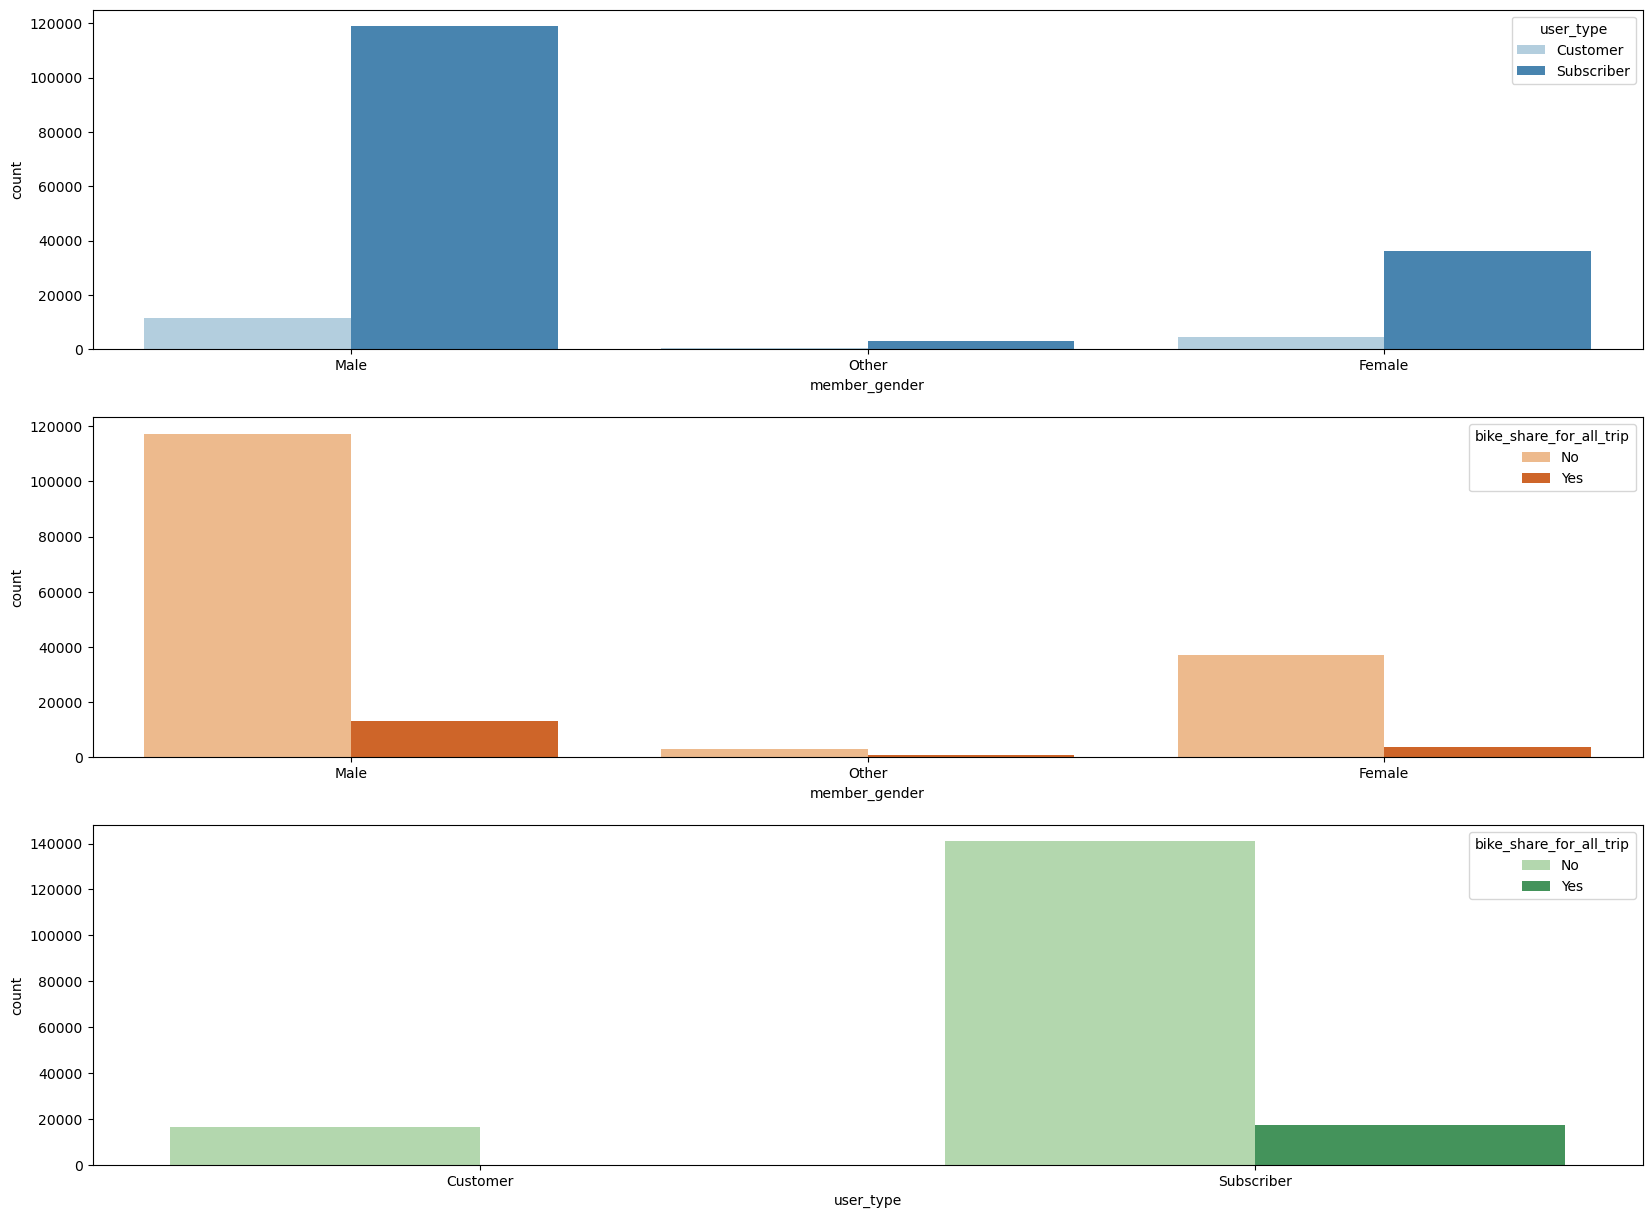

In [63]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=(20, 15))

# subplot 1: member_gender vs user_type
ax = plt.subplot(3, 1, 1)
sb.countplot(data=df_clean, x="member_gender", hue="user_type", palette="Blues")

# subplot 2: member_gender vs. bike_share_for_all_trip
ax = plt.subplot(3, 1, 2)
sb.countplot(
    data=df_clean, x="member_gender", hue="bike_share_for_all_trip", palette="Oranges"
)

# subplot 3: user_type vs. bike_share_for_all_trip, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(
    data=df_clean, x="user_type", hue="bike_share_for_all_trip", palette="Greens"
)

plt.show()

##### Observation

The interactions between the categorical variables doesn't reveal any new insights. It does confirm that regardless of gender, subscribers are dominant and bike trips aren't general shared.

##### Question

How does the numeric data change when faceted by category?

##### Visualization

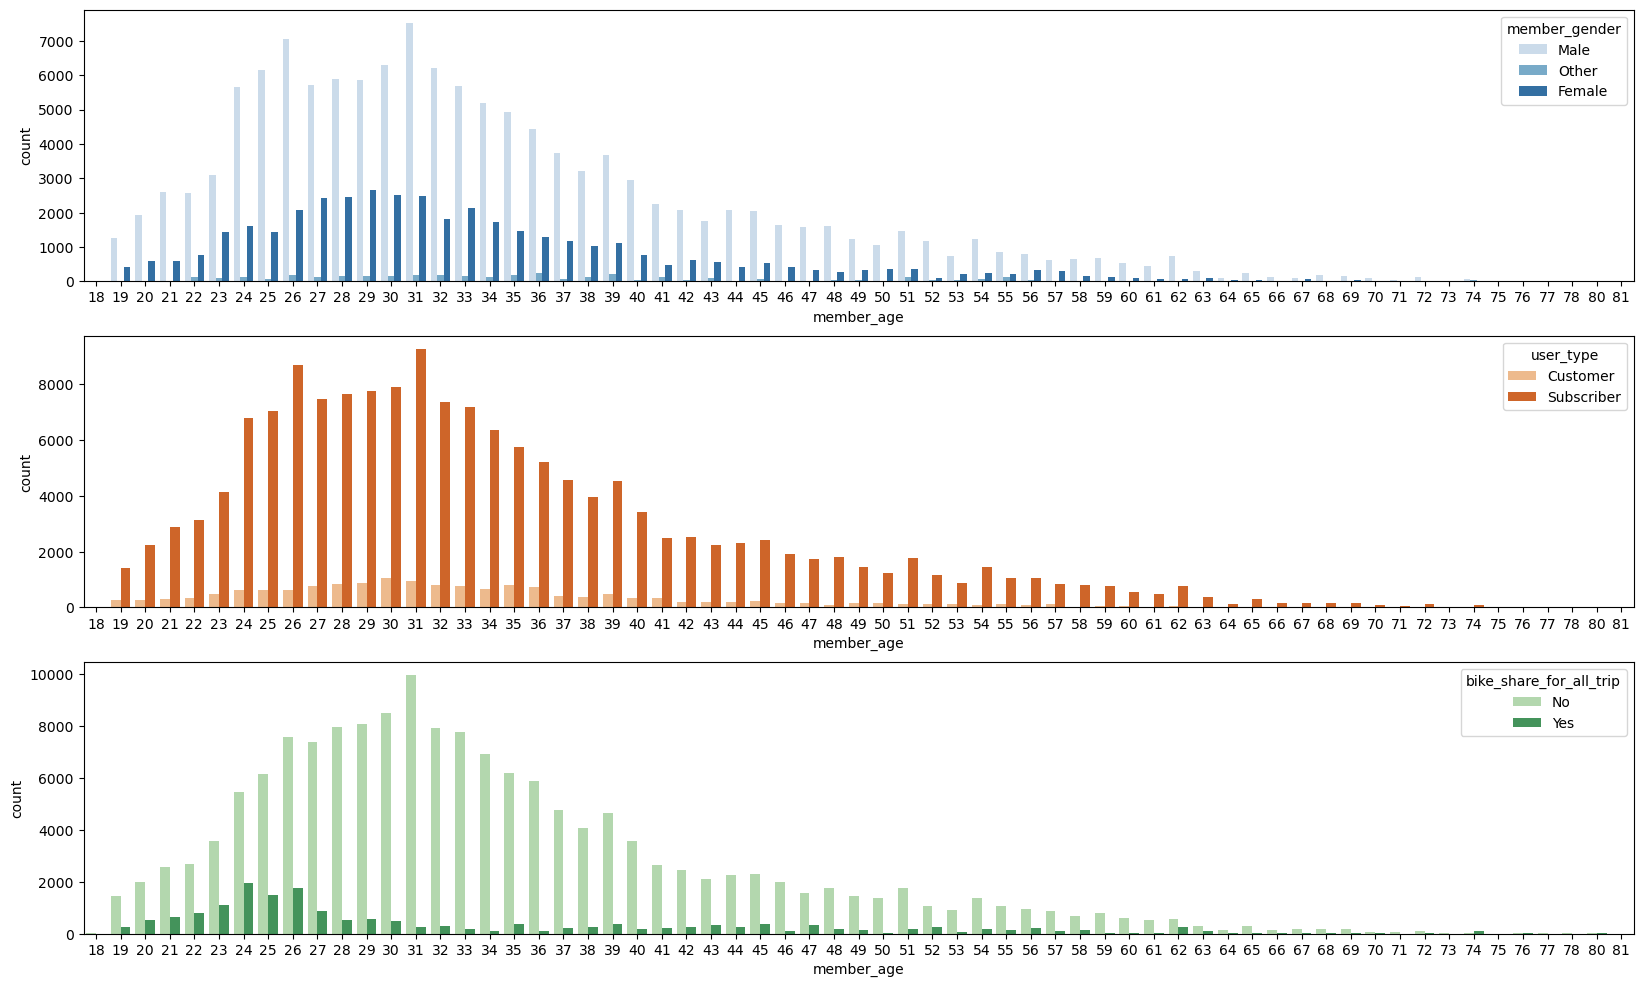

In [64]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=(20, 12))

# subplot 1: member_age vs member_gender
plt.subplot(3, 1, 1)
ax = sb.countplot(data=df_clean, x="member_age", hue="member_gender", palette="Blues")

# subplot 2: member_age vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data=df_clean, x="member_age", hue="user_type", palette="Oranges")

# subplot 3: member_age vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(
    data=df_clean, x="member_age", hue="bike_share_for_all_trip", palette="Greens"
)

plt.show()

Text(0.5, 1.0, 'Distribution of Bike Trip Duration (log)')

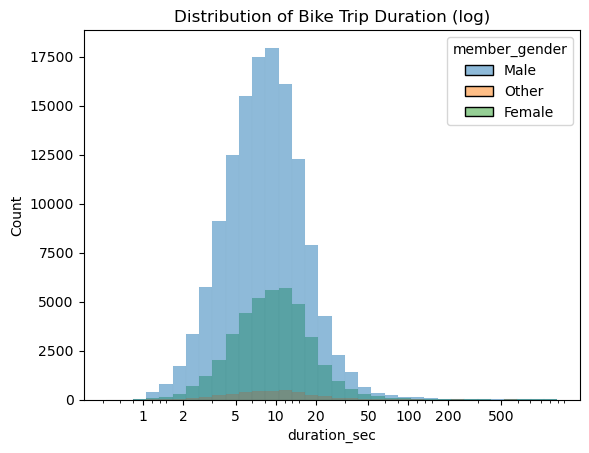

In [65]:
# Axis transformation
# Bin size
bins_log = 10 ** np.arange(1.5, 5, 0.1)

ax = sb.histplot(data=df_clean, x="duration_sec",
                 bins=bins_log, hue="member_gender")
ax.set_xscale("log")

# Generate the x-ticks
ticks = np.array([60, 120, 300, 600, 1200, 3000, 6000, 12000, 30000])

# Convert ticks into string values, to be displaye along the x-axis
labels = [f"{round(v/60)}" for v in ticks]

plt.xticks(ticks, labels)
plt.title("Distribution of Bike Trip Duration (log)")

##### Question

How does the time-series data change when divided by category?

In [66]:
df_time_nom = pd.concat(
    [
        df_clean.member_gender,
        df_clean.user_type,
        df_clean.bike_share_for_all_trip,
        df_clean.start_time,
        df_clean.start_time.dt.day_name(),
        df_clean.start_time.dt.day,
    ],
    axis=1,
    keys=[
        "member_gender",
        "user_type",
        "bike_share_for_all_trip",
        "start_time",
        "day_name",
        "day",
    ],
)

df_time_nom

,member_gender,user_type,bike_share_for_all_trip,start_time,day_name,day
0,Male,Customer,No,2019-02-28 17:32:10.145,Thursday,28
1,Male,Customer,No,2019-02-28 12:13:13.218,Thursday,28
2,Other,Subscriber,No,2019-02-28 17:54:26.010,Thursday,28
3,Male,Subscriber,Yes,2019-02-28 23:54:18.549,Thursday,28
4,Male,Subscriber,No,2019-02-28 23:49:58.632,Thursday,28
...,...,...,...,...,...,...
174947,Male,Subscriber,No,2019-02-01 00:04:49.724,Friday,1
174948,Male,Subscriber,No,2019-02-01 00:05:34.744,Friday,1
174949,Male,Subscriber,Yes,2019-02-01 00:06:05.549,Friday,1
174950,Male,Subscriber,No,2019-02-01 00:05:34.360,Friday,1


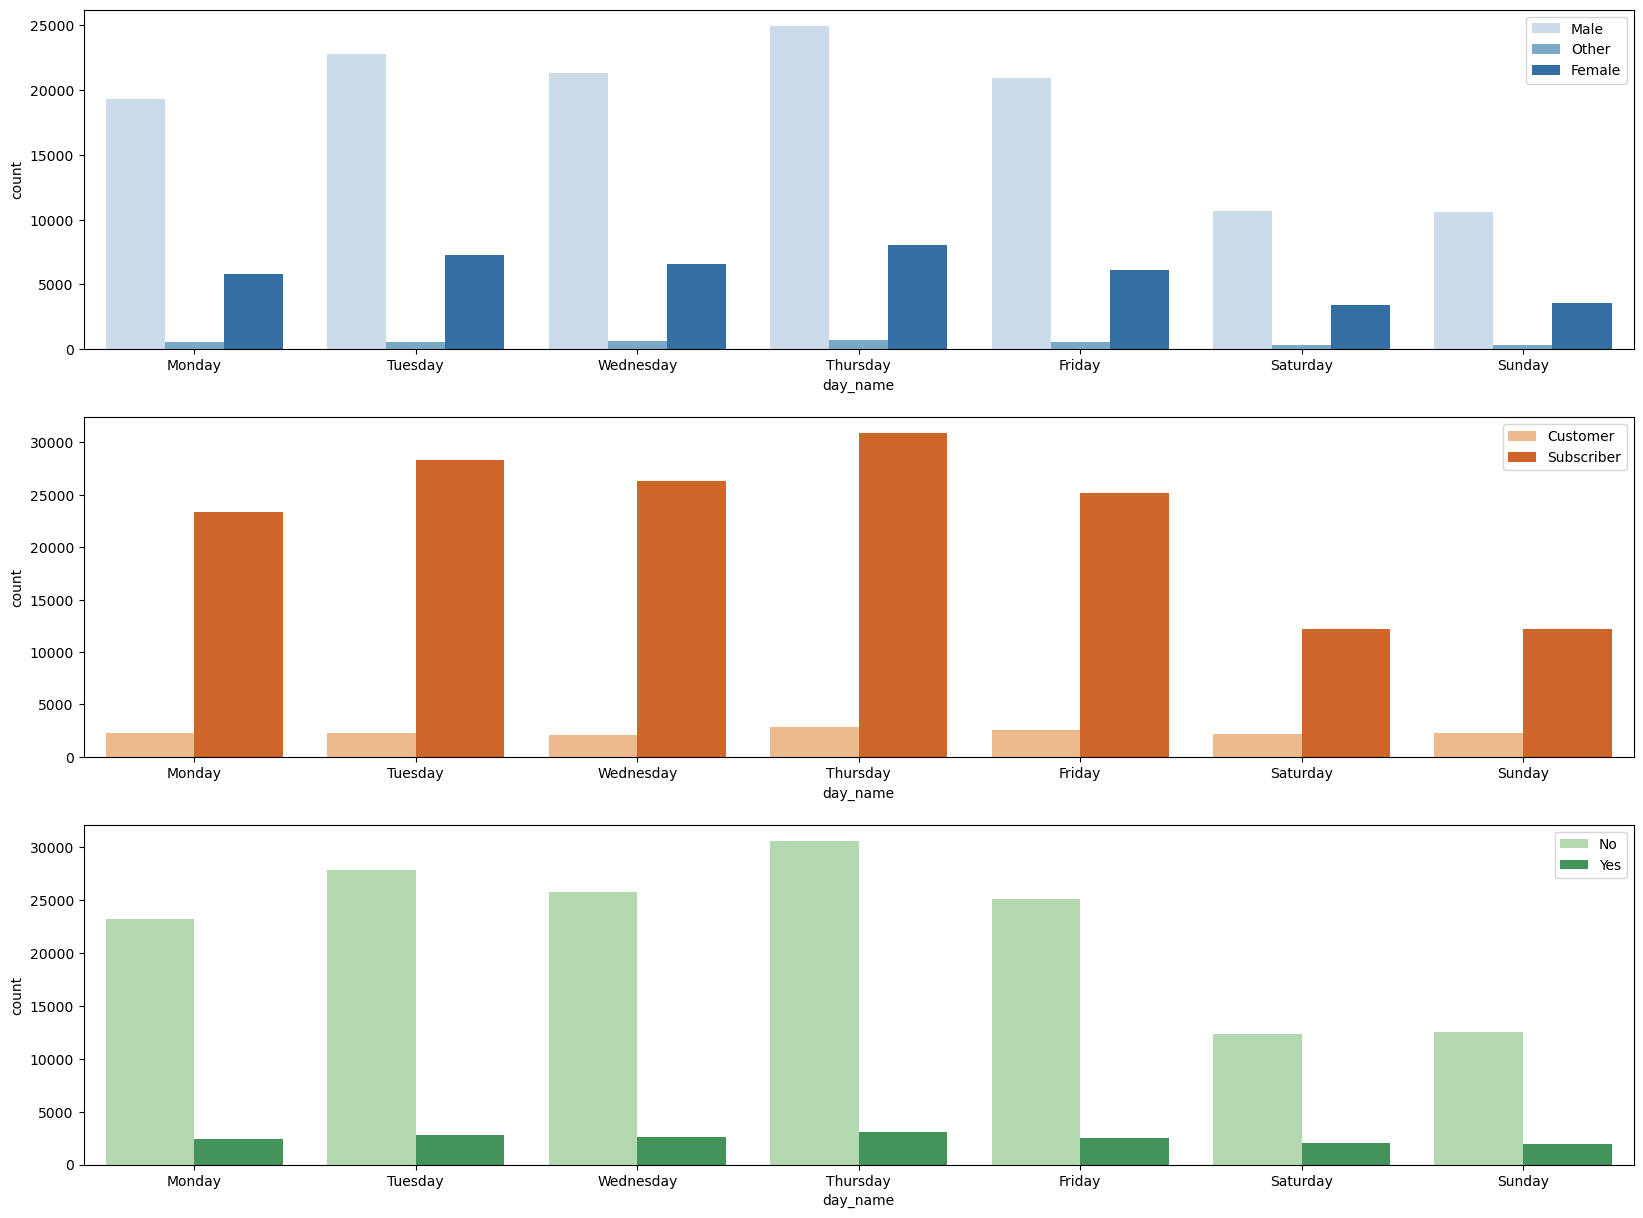

In [67]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize=(20, 15))

# subplot 1: member_gender
ax = plt.subplot(3, 1, 1)
sb.countplot(
    data=df_time_nom,
    x="day_name",
    hue="member_gender",
    palette="Blues",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

ax.legend(loc="upper right")

# subplot 2: user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(
    data=df_time_nom,
    x="day_name",
    hue="user_type",
    palette="Oranges",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

ax.legend(loc="upper right")

# subplot 3: bike_share_for_all_trip
ax = plt.subplot(3, 1, 3)
sb.countplot(
    data=df_time_nom,
    x="day_name",
    hue="bike_share_for_all_trip",
    palette="Greens",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

ax.legend(loc="upper right")

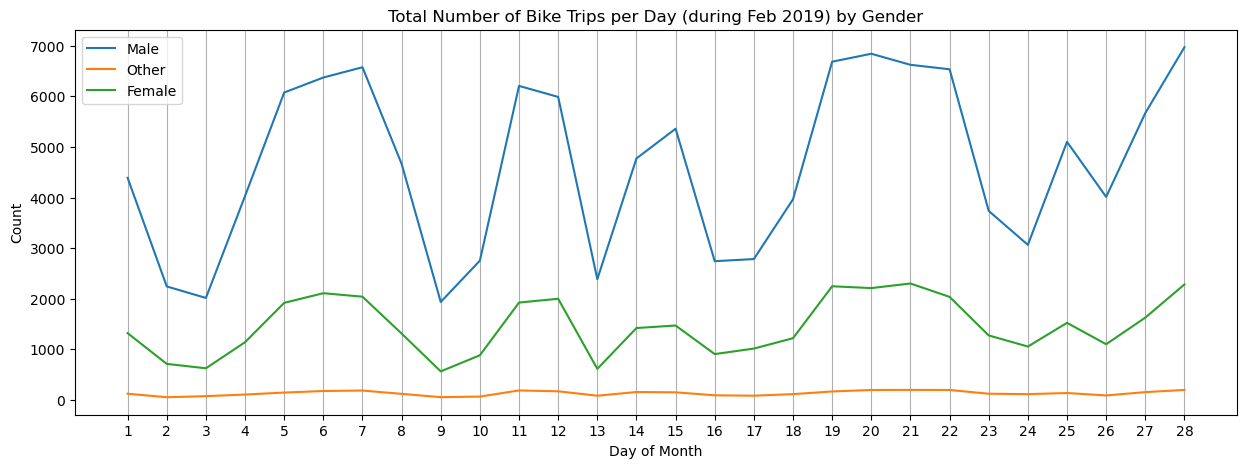

In [68]:
day_counts_by_gender = (
    df_time_nom.groupby("member_gender")["day"].value_counts().sort_index()
)

plt.figure(figsize=(15, 5))
for gender in day_counts_by_gender.index.levels[0]:
    plt.plot(
        day_counts_by_gender[gender].index,
        day_counts_by_gender[gender].values.tolist(),
        label=gender,
    )

# Generate the x-ticks
ticks = range(1, 29, 1)

# Convert ticks into string values, to be displayed along the x-axis
labels = [f"{v}" for v in ticks]

plt.xticks(ticks, labels)
plt.grid(axis="x")
plt.ylabel("Count")
plt.xlabel("Day of Month")
plt.title("Total Number of Bike Trips per Day (during Feb 2019) by Gender")
plt.legend()
plt.show()

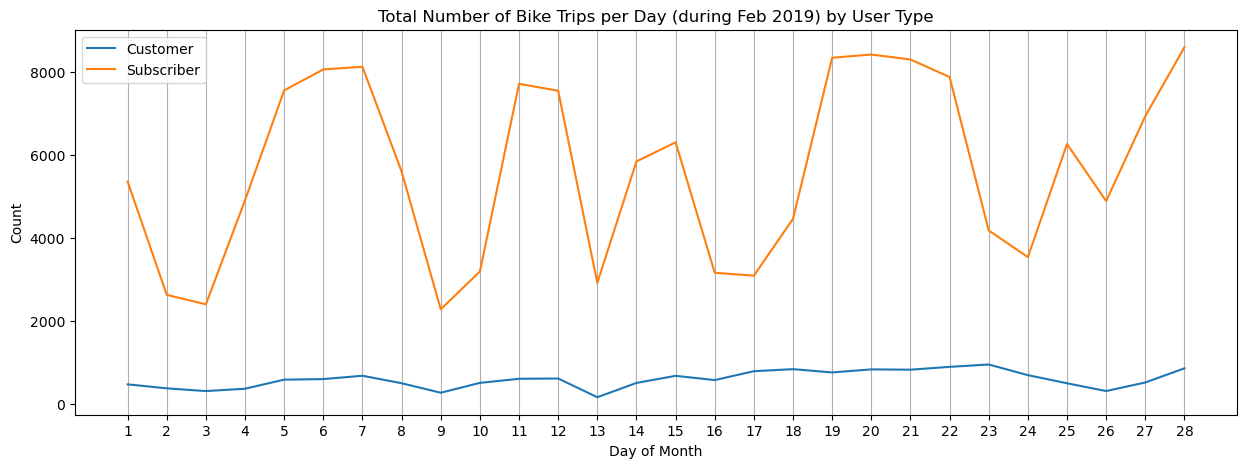

In [69]:
day_counts_by_user_type = (
    df_time_nom.groupby("user_type")["day"].value_counts().sort_index()
)

plt.figure(figsize=(15, 5))
for user_type in day_counts_by_user_type.index.levels[0]:
    plt.plot(
        day_counts_by_user_type[user_type].index,
        day_counts_by_user_type[user_type].values.tolist(),
        label=user_type,
    )

# Generate the x-ticks
ticks = range(1, 29, 1)

# Convert ticks into string values, to be displayed along the x-axis
labels = [f"{v}" for v in ticks]

plt.xticks(ticks, labels)
plt.grid(axis="x")
plt.ylabel("Count")
plt.xlabel("Day of Month")
plt.title("Total Number of Bike Trips per Day (during Feb 2019) by User Type")
plt.legend()
plt.show()

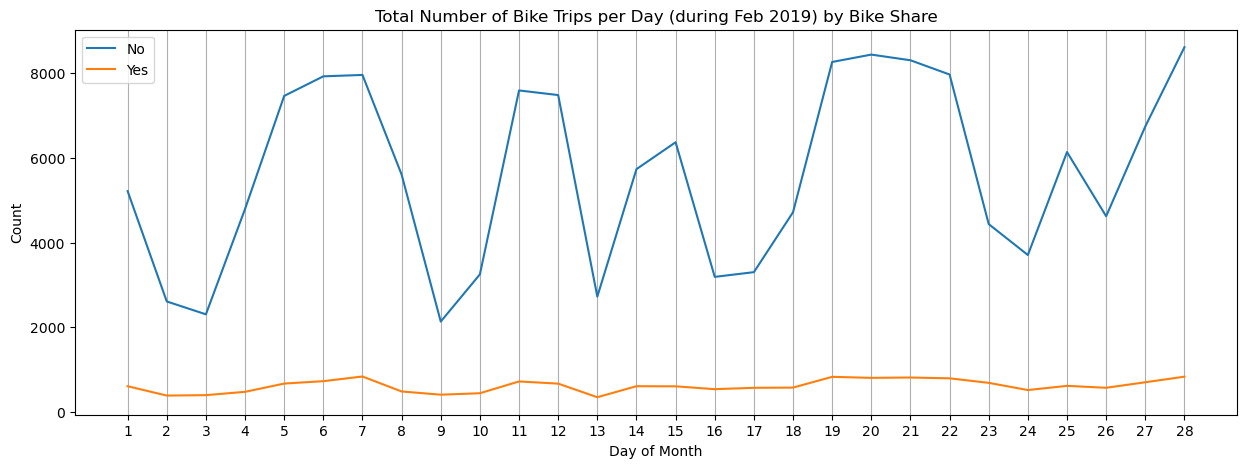

In [70]:
day_counts_by_share = (
    df_time_nom.groupby("bike_share_for_all_trip")["day"].value_counts().sort_index()
)

plt.figure(figsize=(15, 5))
for share in day_counts_by_share.index.levels[0]:
    plt.plot(
        day_counts_by_share[share].index,
        day_counts_by_share[share].values.tolist(),
        label=share,
    )

# Generate the x-ticks
ticks = range(1, 29, 1)

# Convert ticks into string values, to be displayed along the x-axis
labels = [f"{v}" for v in ticks]

plt.xticks(ticks, labels)
plt.grid(axis="x")
plt.ylabel("Count")
plt.xlabel("Day of Month")
plt.title("Total Number of Bike Trips per Day (during Feb 2019) by Bike Share")
plt.legend()
plt.show()

##### Observation

The member age histograms filtered by the categorical variables that females have a lower average age for bike trips than males. Furthermore, users of a younger demographics tend to opt for bike shares trip over the slightly older users. 

The histogram of the trip durations informs us that females have a slightly higher average trip duration and what appears to be a higher variance.

The time-series data when divided by the various categories don't yield any new patterns or insights.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The longitude and latitude information revealed that users bike exchanges were clumped into 3 main locations.

The box and violin plots indicated that about 50% of users are younger than 35 years old and almost all trips are 41 minutes or less.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In general the data is skewed toward males but the patterns and trends are consistent between gender. Inf act, regardless of the categorical differences users exhibited similar trends.


## Multivariate Exploration

Time-Series Data

##### Question

How do bike usages changes over the course of a day in each day of the week?

In [71]:
df_time_series = pd.DataFrame(
    {
        "start_time": df_clean.start_time,
        "day_name": df_clean.start_time.dt.day_name(),
        "weekday": df_clean.start_time.dt.weekday,
        "day": df_clean.start_time.dt.day,
        "hour": df_clean.start_time.dt.hour,
    }
)

df_time_series

,start_time,day_name,weekday,day,hour
0,2019-02-28 17:32:10.145,Thursday,3,28,17
1,2019-02-28 12:13:13.218,Thursday,3,28,12
2,2019-02-28 17:54:26.010,Thursday,3,28,17
3,2019-02-28 23:54:18.549,Thursday,3,28,23
4,2019-02-28 23:49:58.632,Thursday,3,28,23
...,...,...,...,...,...
174947,2019-02-01 00:04:49.724,Friday,4,1,0
174948,2019-02-01 00:05:34.744,Friday,4,1,0
174949,2019-02-01 00:06:05.549,Friday,4,1,0
174950,2019-02-01 00:05:34.360,Friday,4,1,0


In [72]:
grouped_data = (
    df_time_series.groupby(["weekday", "day_name", "hour"])
    .size()  # get number of bikes rented out during hour
    .reset_index(name="total")  # convert to dataframe
    .drop(columns="weekday")  # drop sorting column
)

# COnvert total trips for that hour per week day to average over month (i.e. average number of bikes rented in that hour for that day over the month)
grouped_data["average"] = grouped_data.total / 4

grouped_data

,day_name,hour,total,average
0,Monday,0,97,24.25
1,Monday,1,44,11.00
2,Monday,2,40,10.00
3,Monday,3,20,5.00
4,Monday,4,40,10.00
...,...,...,...,...
163,Sunday,19,756,189.00
164,Sunday,20,558,139.50
165,Sunday,21,455,113.75
166,Sunday,22,279,69.75


##### Visualization

Text(0, 0.5, 'Count')

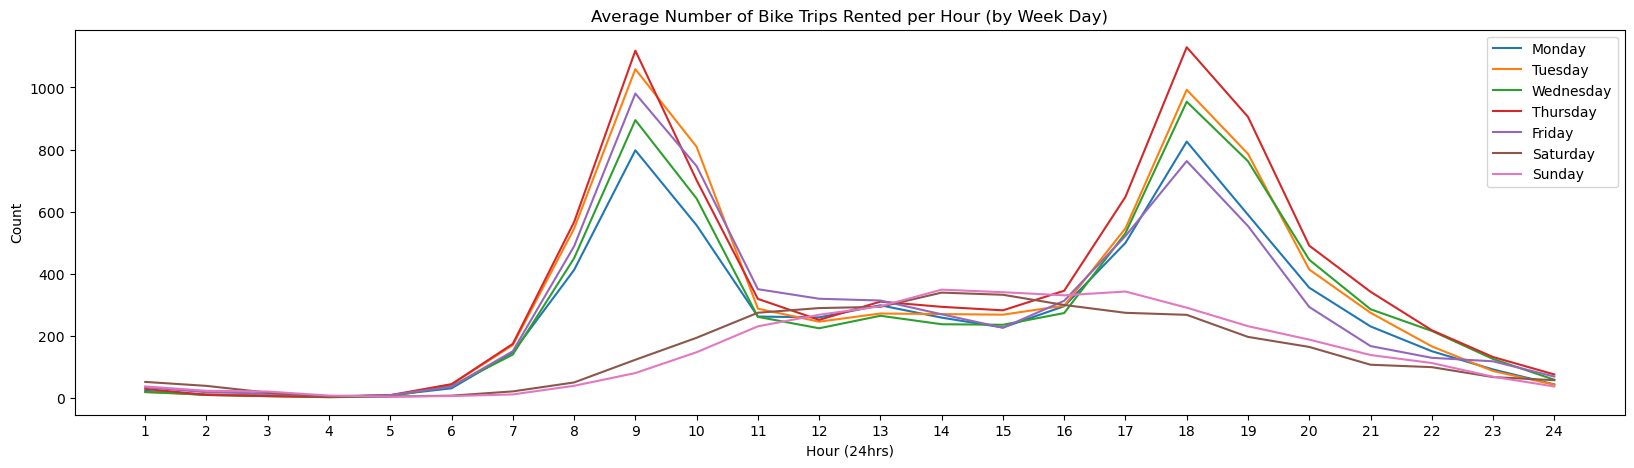

In [73]:
# visualize the average number of bike trips per hour (per day)
# y-axis = average count, x-axis=hours 1am, 2am, -> 11pm 12pm, color=day of week

day_names = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(20, 5))

for day in day_names:
    data = grouped_data.loc[grouped_data.day_name == day][["hour", "average"]]
    plt.plot("hour", "average", data=data)

plt.xticks(ticks=range(0, 24), labels=range(1, 25))
plt.xlabel("Hour (24hrs)")
plt.legend(day_names)
plt.title("Average Number of Bike Trips Rented per Hour (by Week Day)")
plt.ylabel("Count")

##### Observation

Examining the average number of bike trips per hour over the course of one day, two patterns are revealed. During the week days, there are two clear spikes - around 9am and 6pm. This may been when users are going to and returning from work. The weekends have their own pattern with a subtle gradient peaking around 2pm.

I'll facet by the day of the week to simply the view.

<Figure size 640x480 with 0 Axes>

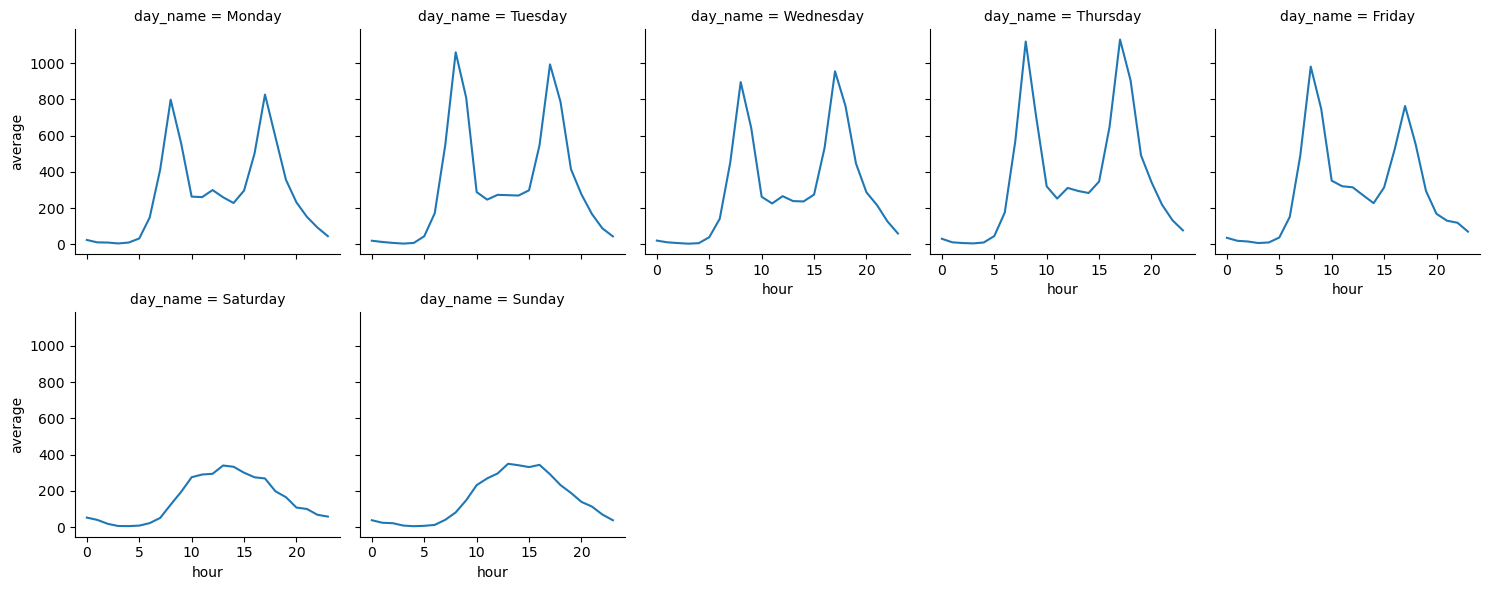

In [74]:
plt.figure()
g = sb.FacetGrid(data=grouped_data, col="day_name", col_wrap=5)
g.map(plt.plot, "hour", "average")

##### Observation

In the facet grid, it is more clear that the week days have in fact 3 peaks, one minor peak around midday, (perhaps lunch break). Also Tuesdays and Thursdays seem to have higher bike usage than other days.

##### Question 

Does spatial data change with category?

In [75]:
df_spatial = pd.concat(
    [
        df_clean.start_station_latitude,
        df_clean.start_station_longitude,
        df_clean.end_station_latitude,
        df_clean.end_station_longitude,
        df_clean.member_gender,
        df_clean.bike_share_for_all_trip,
        df_clean.user_type,
    ],
    axis=1,
    keys=[
        "start_station_latitude",
        "start_station_longitude",
        "end_station_latitude",
        "end_station_longitude",
        "member_gender",
        "bike_share_for_all_trip",
        "user_type",
    ],
)
df_spatial

,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_gender,bike_share_for_all_trip,user_type
0,37.789625,-122.400811,37.794231,-122.402923,Male,No,Customer
1,37.769305,-122.426826,37.786375,-122.404904,Male,No,Customer
2,37.774836,-122.446546,37.773311,-122.444293,Other,No,Subscriber
3,37.804562,-122.271738,37.792714,-122.248780,Male,Yes,Subscriber
4,37.770407,-122.391198,37.798014,-122.405950,Male,No,Subscriber
...,...,...,...,...,...,...,...
174947,37.788059,-122.391865,37.788300,-122.408531,Male,No,Subscriber
174948,37.789625,-122.400811,37.778742,-122.392741,Male,No,Subscriber
174949,37.331932,-121.904888,37.333658,-121.908586,Male,Yes,Subscriber
174950,37.811351,-122.273422,37.817827,-122.275698,Male,No,Subscriber


##### Visualization

Text(0, 0.5, 'Longitude')

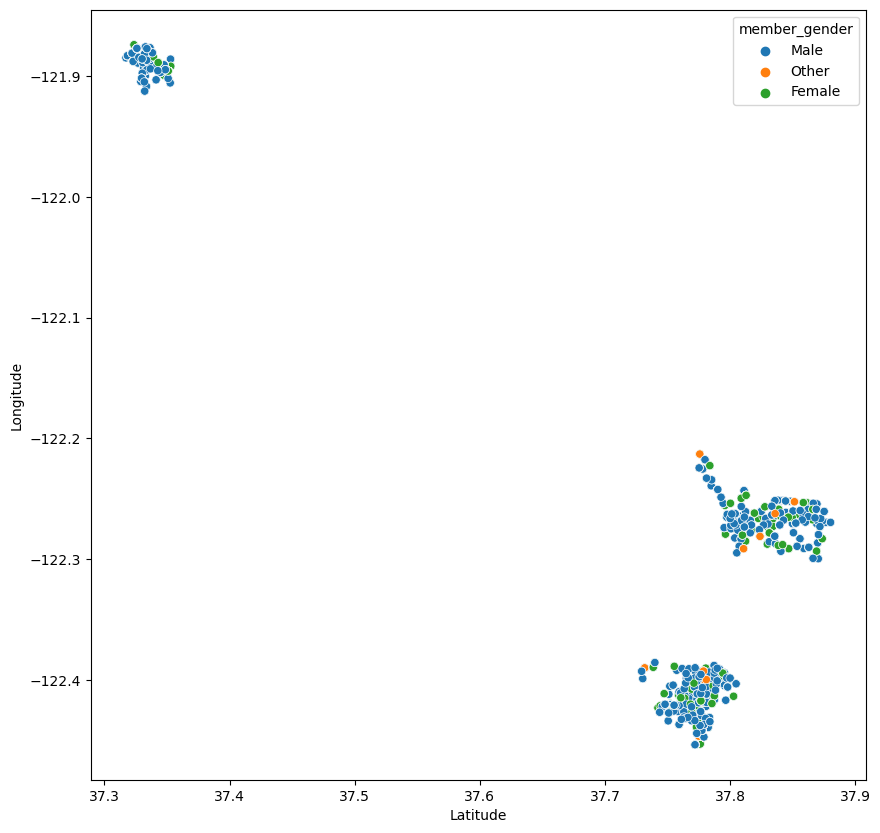

In [76]:
plt.figure(figsize=(10, 10))

sb.scatterplot(
    x="start_station_latitude",
    y="start_station_longitude",
    data=df_spatial,
    hue="member_gender",
)

plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(0, 0.5, 'Longitude')

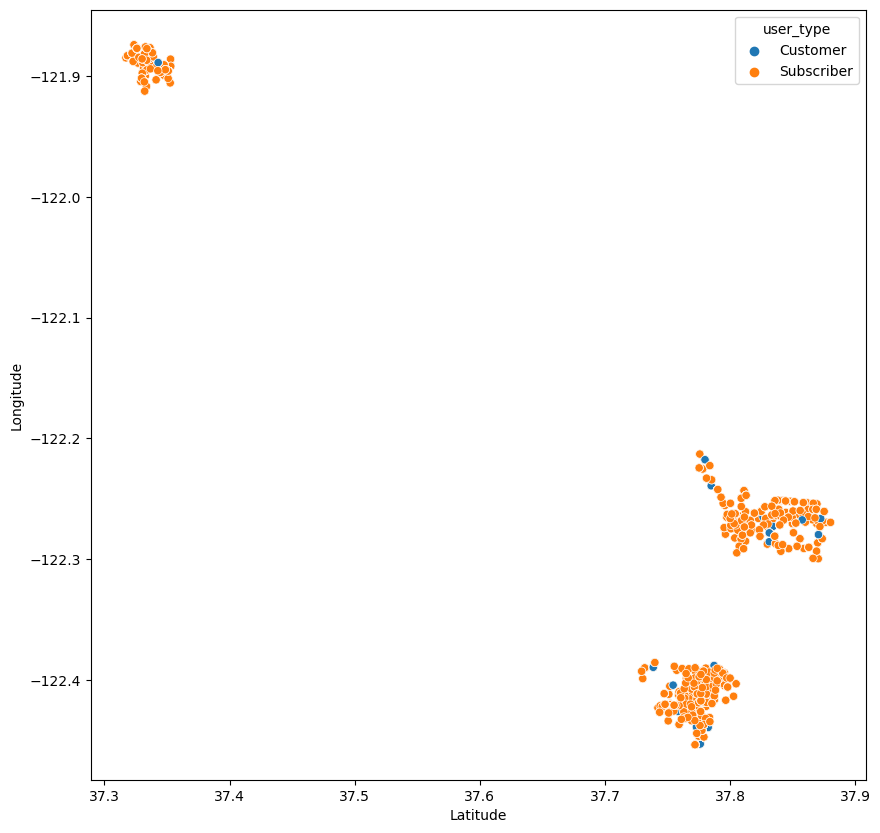

In [77]:
plt.figure(figsize=(10, 10))

sb.scatterplot(
    x="start_station_latitude",
    y="start_station_longitude",
    data=df_spatial,
    hue="user_type",
)

plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(0, 0.5, 'Longitude')

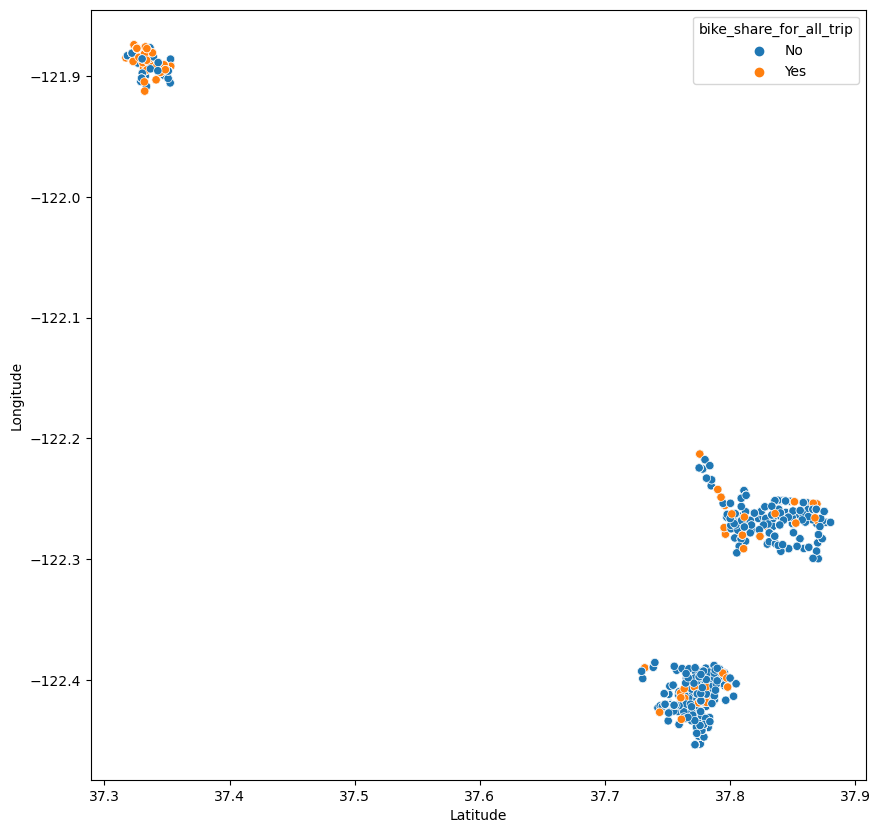

In [78]:
plt.figure(figsize=(10, 10))

sb.scatterplot(
    x="start_station_latitude",
    y="start_station_longitude",
    data=df_spatial,
    hue="bike_share_for_all_trip",
)

plt.xlabel("Latitude")
plt.ylabel("Longitude")

##### Observations

Unfortunately, not deeper findings are unlocked by dividing the spatial data into categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

By seperating the hourly break down of bike usage by day of the week, a clear pattern emerged: during the the work week bike usage was was its highest in the morning between 8 and 10 am and in the afternoon between 5 and 7 pm. This resulted in a bimodal pattern.

### Were there any interesting or surprising interactions between features?

Interestingly, on the weekend, the pattern is unimodal with its peak around 12 - 2 pm. This suggest different usage cases on the weekend versus the week day.


## Conclusions

This notebook explored the Ford GoBike System Dataset and investigated trends and patterns between different numeric and categorical variables as well as time-series data.

The main findings include:
- Most bike trips are about 6-8 minutes in duration.
- Male customers make up 3 times as many customers than females.
- 50% of the bike trip users are under the age of 32.
- Bike usage during the week is higher than the weekends
- Bike usage patterns are cyclical: 
    - Bike usages increasing throughout the week and drops off towards the weekend
    - During the work week, a bimodal cycle appear with peaks around the morning at 8am and afternoon at 6pm
    - During the weekend, bike usage patterns are unimodal with a peak around 1pm